In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import IPython.display
IPython.display.set_matplotlib_formats('svg')
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from datetime import datetime
from nltk import sent_tokenize
import spacy
from fuzzywuzzy import fuzz

In [2]:
path_alltrails = 'datasets/alltrails/'
path_npspecies = 'datasets/npspecies/'

# Read in list of parks/trails from AllTrails

In [28]:
park_csv_list = glob.glob(path_alltrails+'trails_*.csv')
df_park_full_list = []
for park_csv_file in park_csv_list:
    df_park_current = pd.read_csv(park_csv_file, header=None, names=['park_name','trail_name','rating','n1','n2','n3','url'], encoding="ISO-8859-1")
    df_park_current.dropna(inplace=True)
    df_park_current['park'] = park_csv_file.split("\\")[-1].replace('.csv', '').replace('trails_', '')
    df_park_current['trail'] = df_park_current['url'].str.split('/').str[-1]
    df_park_full_list.append(df_park_current)
df_park_list = pd.concat(df_park_full_list, sort=False)
df_park_list

,park_name,trail_name,rating,n1,n2,n3,url,park,trail
0,Apostle Islands National Lakeshore,Rifugio Vittorio Sella,HARD,(6),5.0,Showing 216 trails,https://www.alltrails.com/explore/trail/italy/...,apostle-islands-national-lakeshore,rifugio-vittorio-sella
1,Apostle Islands National Lakeshore,Sella-Herbetet Traverse,HARD,(9),5.0,Showing 216 trails,https://www.alltrails.com/explore/trail/italy/...,apostle-islands-national-lakeshore,sella-herbetet-traverse-loop
2,Apostle Islands National Lakeshore,Bonatti Refuge to Arnuva,MODERATE,(35),5.0,Showing 216 trails,https://www.alltrails.com/explore/trail/italy/...,apostle-islands-national-lakeshore,refugio-bonatti-to-arnuva
3,Apostle Islands National Lakeshore,Valnontey River Trail,MODERATE,(4),4.5,Showing 216 trails,https://www.alltrails.com/explore/trail/italy/...,apostle-islands-national-lakeshore,valnontey-river-trail
4,Apostle Islands National Lakeshore,Col Ferret,MODERATE,(27),5.0,Showing 216 trails,https://www.alltrails.com/explore/trail/italy/...,apostle-islands-national-lakeshore,col-ferret
...,...,...,...,...,...,...,...,...,...
488,Yellowstone National Park,Shoshone Lake Via Delacy Creek Trail,EASY,(45),4.0,Showing 26 trails,https://www.alltrails.com/explore/trail/us/wyo...,yellowstone-national-park,shoshone-lake-via-delacy-creek-trail
489,Yellowstone National Park,Biscuit Basin to Goose Lake via Little Firehole,MODERATE,(4),4.0,Showing 26 trails,https://www.alltrails.com/explore/trail/us/wyo...,yellowstone-national-park,biscuit-basin-to-goose-lake-via-little-firehole
490,Yellowstone National Park,Delacy Creek Trail to Shoshone Lake,HARD,(13),4.5,Showing 26 trails,https://www.alltrails.com/explore/trail/us/wyo...,yellowstone-national-park,delacy-creek-trail-to-shoshone-lake
491,Yellowstone National Park,Divide Mountain Trail,MODERATE,(6),3.0,Showing 26 trails,https://www.alltrails.com/explore/trail/us/wyo...,yellowstone-national-park,divide-mountain-trail


# Read in NPS species data for all parks

In [29]:
np_list = glob.glob(path_npspecies+'NPSpecies_FullListWithDetails_*.xlsx')
df_np_list = []
for np_file in np_list:
    df_np_current = pd.read_excel(np_file)
    df_np_list.append(df_np_current)
df_np = pd.concat(df_np_list)

In [30]:
df_np_orig = df_np.copy()

In [316]:
df_np = df_np_orig.copy()

In [317]:
# Add certain wildlife words which are not in the NPSpecies data for certain types of wildlife
df_np['Common Names'] = df_np['Common Names'].str.replace(r'(blue)$|(copper)$|(blue),|(copper),', r'\1 butterfly')
df_np['Common Names'] = df_np['Common Names'].str.replace(r'(top)$', r'\1 slug, \1 snail')


df_np['Long name'] = df_np['Common Names'].str.split(',').apply(lambda x: [str.strip(y) for y in x] if (type(x) is list) else x)
# df_np['Common Names'] = df_np['Long name'].dropna().apply(lambda x: ','.join(map(str, x)))

df_np['Short name'] = df_np['Common Names'].str.split(',').apply(lambda x: sorted(list(dict.fromkeys([str.lower(y.split(' ')[-1]) for y in x]))) if (type(x) is list) else x)
# df_np[['Common Names','Long name','Short name']]

In [318]:
# df_np.to_csv('test.csv')

In [319]:
df_np # df_np[['Common Names','Long name','Short name']]

,Region,Park Code,Park Name,Category,Category Sort,Order,Family,Taxon Code,TSN,Taxon Record Status,...,Observations,Vouchers,ExternalLinks,T&E,State Status,Ozone,GRank,SRank,Long name,Short name
0,NaN,ABLI,Abraham Lincoln Birthplace National Historical...,Mammal,1,Artiodactyla,Cervidae,95046,180699.0,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,G5,KY: S5,[white-tailed deer],[deer]
1,NaN,ABLI,Abraham Lincoln Birthplace National Historical...,Mammal,1,Carnivora,Canidae,93340,180599.0,Active,...,NaN,NaN,NaN,SC,NaN,NaN,G5,KY: S5,[coyote],[coyote]
2,NaN,ABLI,Abraham Lincoln Birthplace National Historical...,Mammal,1,Carnivora,Canidae,93352,180609.0,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,G5,KY: S4,[common gray fox],[fox]
3,NaN,ABLI,Abraham Lincoln Birthplace National Historical...,Mammal,1,Carnivora,Canidae,93347,180604.0,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,G5,KY: S5,[red fox],[fox]
4,NaN,ABLI,Abraham Lincoln Birthplace National Historical...,Mammal,1,Carnivora,Felidae,93322,180582.0,Active,...,NaN,NaN,NaN,RT,NaN,NaN,G5,KY: S4,[bobcat],[bobcat]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,NaN,ZION,Zion National Park,Vascular Plant,6,Solanales,Solanaceae,132705,30461.0,Active,...,NaN,"1047806, 1047807",NaN,NaN,NaN,NaN,G5,UT: SNR,[cut-leaf nightshade],[nightshade]
1794,NaN,ZION,Zion National Park,Vascular Plant,6,Vitales,Vitaceae,124847,28612.0,Active,...,NaN,"1047877, 1047878, 1047879, 1047880, 1047881, 1...",NaN,NaN,NaN,NaN,G5?,UT: S1,[canyon grape],[grape]
1795,NaN,ZION,Zion National Park,Vascular Plant,6,Vitales,Vitaceae,125669,28629.0,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,G4,UT: SNA,[wine grape],[grape]
1796,NaN,ZION,Zion National Park,Vascular Plant,6,Zygophyllales,Zygophyllaceae,128408,29051.0,Active,...,NaN,1048101,NaN,NaN,NaN,NaN,G5,UT: SNR,[creosote bush],[bush]


In [320]:
df_np_fauna = df_np[~df_np['Category'].str.contains('plant|bacteria|chromista|protozoa|fungi', case=False)]
# sources: http://npshistory.com/publications/interdisciplinary/im/npspecies-user-manual-2011.pdf and http://www.birdweb.org/birdweb/abundancecode/ecoregion
df_np_fauna_renum = df_np_fauna
df_np_fauna_renum.Occurrence.replace(to_replace={'':0.0,'NA':0.0,'False Report':0.0,'Not In Park':0.0,'Historic':0.2,'Encroaching':0.4,'Unknown':0.5,'Unconfirmed':0.6,'Probably Present':0.8,'Present in Park':1.0,'Present':1.0}, value=None, inplace=True)
df_np_fauna_renum.Abundance.replace(to_replace={'':0.0,'NA':0.0,'Irregular':0.0,'Occasional':0.2,'Rare':0.4,'Unknown':0.5,'Uncommon':0.6,'Common':0.8,'Abundant':1.0}, value=None, inplace=True)

# df_np_fauna_uniq = pd.DataFrame(np.unique(df_np_fauna[['Short name']].dropna()),columns=['Short name']) # cannot use drop_duplicates() on list
# # df_np_fauna_renum[['Occurrence','Abundance']]
# # df_np_fauna_uniq_pop = pd.DataFrame(np.unique(df_np_fauna[['Short name']].dropna()),columns=['Short name','Occurrence','Abundance']) # cannot use drop_duplicates() on list
# # np.concatenate((np.unique(df_np_fauna[['Short name']].dropna()),df_np_fauna[['Occurrence']].to_numpy()), axis=1)#df_np_fauna_uniq_pop
# df_np_fauna_renum_3 = df_np_fauna_renum[['Short name','Occurrence','Abundance']].dropna()
# df_np_fauna_renum_3['Short name str'] = df_np_fauna_renum_3['Short name'].astype(str)
# df_np_fauna_renum_3_max = df_np_fauna_renum_3[['Short name str','Occurrence','Abundance']].groupby('Short name str').max() # choosing highest likelihood
# df_np_fauna_uniq_pop = df_np_fauna_renum_3_max.merge(df_np_fauna_renum_3[['Short name','Short name str']], on='Short name str', how='left')
# df_np_fauna_uniq_pop.drop(columns=['Short name str'], inplace=True)
# df_np_fauna_uniq_pop = df_np_fauna_uniq_pop[['Short name','Occurrence','Abundance']]
# df_np_fauna_uniq_pop

# Remove rows with missing Short name
df_np_fauna_renum_nomissing = df_np_fauna_renum[~pd.isnull(df_np_fauna_renum['Short name'])]

# Define Long name str
df_np_fauna_renum_nomissing['Long name str'] = df_np_fauna_renum_nomissing.apply(lambda x: x['Long name'][0], axis=1)

# Stitch together the Short name lists
df_np_fauna_renum_nomissing_uniq = df_np_fauna_renum_nomissing.groupby(['Park Name', 'Long name str']).agg({
    'Short name': 'sum',
    'Category': pd.Series.mode,
    'Scientific Name': pd.Series.mode,
    'Occurrence': 'mean',
    'Abundance': 'mean',
})
df_np_fauna_renum_nomissing_uniq
# df_np_fauna_renum_nomissing.groupby(['Park Name', 'Long name str']).count()
# df_np_fauna_renum_nomissing

C:\Users\Sumit\.conda\envs\insight\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Short name  \
Park Name                                          Long name str                                           
Abraham Lincoln Birthplace National Historical ... American toad                                  [toad]   
                                                   Blue Dasher                                  [dasher]   
                                                   Blue-headed Vireo                             [vireo]   
                                                   Brown Creeper                               [creeper]   
                                                   Carolina Chickadee                        [chickadee]   
...                                                                                                  ...   
Zion National Park                                 western patch-nosed snake              [snake, snake]   
                                                   western rattlesnake        [rattlesnake, rattlesnake]   
                                                   western skink                          [skink, skink]   
                                                   western whiptail                 [whiptail, whiptail]   
                                                   zebra-tailed lizard                  [lizard, lizard]   

                                                                               Category  \
Park Name                                          Long name str                          
Abraham Lincoln Birthplace National Historical ... American toad              Amphibian   
                                                   Blue Dasher                   Insect   
                                                   Blue-headed Vireo               Bird   
                                                   Brown Creeper                   Bird   
                                                   Carolina Chickadee              Bird   
...                                                                                 ...   
Zion National Park                                 western patch-nosed snake    Reptile   
                                                   western rattlesnake          Reptile   
                                                   western skink                Reptile   
                                                   western whiptail             Reptile   
                                                   zebra-tailed lizard          Reptile   

                                                                                      Scientific Name  \
Park Name                                          Long name str                                        
Abraham Lincoln Birthplace National Historical ... American toad                      Bufo americanus   
                                                   Blue Dasher                Pachydiplax longipennis   
                                                   Blue-headed Vireo                 Vireo solitarius   
                                                   Brown Creeper                    Certhia americana   
                                                   Carolina Chickadee            Poecile carolinensis   
...                                                                                               ...   
Zion National Park                                 western patch-nosed snake      Salvadora hexalepis   
                                                   western rattlesnake              Crotalus oreganus   
                                                   western skink                 Eumeces skiltonianus   
                                                   western whiptail              Cnemidophorus tigris   
                                                   zebra-tailed lizard        Callisaurus draconoides   

                                                                              Occurrence  \
Park Name                                      

In [321]:
df_np_fauna_renum_nomissing_uniq_short = df_np_fauna_renum_nomissing_uniq.reset_index()
df_np_fauna_renum_nomissing_uniq_short.to_csv(path_alltrails+'old_test_df_np_fauna_renum_nomissing_uniq_short.csv')
df_np_fauna_renum_nomissing_uniq_short['Short name'] = df_np_fauna_renum_nomissing_uniq_short.apply(
    lambda x: list(np.unique(np.array(x['Short name']))), axis=1
)
df_np_fauna_renum_nomissing_uniq_short
# If you only want to try this on bears uncomment this: # df_np_fauna_renum_nomissing_uniq_short = df_np_fauna_renum_nomissing_uniq_short[(df_np_fauna_renum_nomissing_uniq_short['Park Name'] == 'Yellowstone National Park') & df_np_fauna_renum_nomissing_uniq_short['Long name str'].str.contains('Bear')]

,Park Name,Long name str,Short name,Category,Scientific Name,Occurrence,Abundance
0,Abraham Lincoln Birthplace National Historical...,American toad,[toad],Amphibian,Bufo americanus,1.0,0.6
1,Abraham Lincoln Birthplace National Historical...,Blue Dasher,[dasher],Insect,Pachydiplax longipennis,1.0,NaN
2,Abraham Lincoln Birthplace National Historical...,Blue-headed Vireo,[vireo],Bird,Vireo solitarius,1.0,0.6
3,Abraham Lincoln Birthplace National Historical...,Brown Creeper,[creeper],Bird,Certhia americana,1.0,0.6
4,Abraham Lincoln Birthplace National Historical...,Carolina Chickadee,[chickadee],Bird,Poecile carolinensis,1.0,0.8
...,...,...,...,...,...,...,...
94173,Zion National Park,western patch-nosed snake,[snake],Reptile,Salvadora hexalepis,1.0,0.5
94174,Zion National Park,western rattlesnake,[rattlesnake],Reptile,Crotalus oreganus,1.0,0.6
94175,Zion National Park,western skink,[skink],Reptile,Eumeces skiltonianus,1.0,0.6
94176,Zion National Park,western whiptail,[whiptail],Reptile,Cnemidophorus tigris,1.0,1.0


In [322]:
# df_np_fauna_renum.groupby('Park Name').count()

In [75]:
df_park_list_no_trails = df_park_list.groupby(['park_name','park']).count().reset_index()

In [76]:
df_park_list_no_trails = df_park_list_no_trails.iloc[::-1].reset_index().drop(columns=['index'])

In [77]:
df_park_list_no_trails

,park_name,park,trail_name,rating,n1,n2,n3,url,trail
0,Yellowstone National Park,yellowstone-national-park,409,409,409,409,409,409,409
1,White House,white-house,69,69,69,69,69,69,69
2,Sequoia National Park,sequoia-national-park,52,52,52,52,52,52,52
3,Petrified Forest National Park,petrified-forest-national-park,16,16,16,16,16,16,16
4,Natural Bridges National Monument,natural-bridges-national-monument,16,16,16,16,16,16,16
5,Mesa Verde National Park,mesa-verde-national-park,20,20,20,20,20,20,20
6,Mary McLeod Bethune Council House National His...,mary-mcleod-bethune-council-house-national-his...,3,3,3,3,3,3,3
7,Hot Springs National Park,hot-springs-national-park,46,46,46,46,46,46,46
8,Franklin D. Roosevelt Memorial,franklin-d-roosevelt-memorial,78,78,78,78,78,78,78
9,Fort Laramie National Historic Site,fort-laramie-national-historic-site,7,7,7,7,7,7,7


# NLP setup

In [323]:
import spacy
nlp = spacy.load('en_core_web_sm') #, disable=["tagger", "parser"])

In [324]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['spot','rail','bike','like','stuck','luck','lucky','blue','copper','top','lady','beautiful','beauty'])

In [325]:
from nltk import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

In [326]:
# Make a separate function for each NLP scoring technique
# Output: score for the review with respect to whether the animal was sighted based on the review

def nlp_score_review_match(animal, review):
    return int(animal in review.lower())

def nlp_score_review_match_lastword(animal, review):
    return int(animal.split(' ')[-1] in review.lower())

def nlp_score_review_match_separated(animal, review):
    # from nltk import word_tokenize
    words = word_tokenize(review.lower())
    
    # word tokenize
    return int(animal in words)

def nlp_score_review_match_separated_lastword(animal, review):
    # from nltk import word_tokenize
    words = word_tokenize(review.lower())
    
    # print(animal.split(' ')[-1])
    # print(words)
    # if int(animal.split(' ')[-1] in words) > 0:
    #     print('matched')
    
    # word tokenize
    return int(animal.split(' ')[-1] in words)

def nlp_score_review_match_sentence_non_neg(animal, review):
    # from nltk import sent_tokenize
    
    sentences = sent_tokenize(review.lower())
    
    # animal = animal.split(' ')[-1]
    
    current_score = 0.0
    for sentence in sentences:
        doc = nlp(sentence)
        negative_found = False
        negative_multiplier = 1.0
        for token in doc:
            # print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
            if token.dep_=='neg':
                negative_found = True
                negative_multiplier = -1.0
        word_list = [token.text for token in doc]
        # Score the sentence based on if words in the sentence match the animal
        for word in word_list:
            if (fuzz.WRatio(animal, word) >= 80) and (word not in stop_words):
                current_sentence_score = (float(fuzz.WRatio(animal, word))/100.0) * negative_multiplier
                current_score += current_sentence_score
                # print('Sentence score: '+str(current_sentence_score)+'. Match found between: '+animal+','+word+', ratio: '+str(fuzz.WRatio(animal, word))+' in '+sentence)
    return current_score

def nlp_score_review_match_sentence_non_neg_seewords(animal, review):
    # from nltk import sent_tokenize
    # from nltk.stem.wordnet import WordNetLemmatizer
    # from nltk.corpus import wordnet
    
    sentences = sent_tokenize(review.lower())
    # lemmatizer = WordNetLemmatizer()
    
    current_score = 0.0
    for sentence in sentences:
        doc = nlp(sentence)
        negative_found = False
        negative_multiplier = 1.0
        for token in doc:
            # print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
            if token.dep_=='neg':
                negative_found = True
                negative_multiplier = -1.0
        word_list = [token.text for token in doc]
        # Find presence of verbs indicating sighting of the animal and modify score accordingly
        sighting_multiplier = 1.0
        # Add 'saw' below since lemmatizer won't handle 'saw' as 'see'
        sighting_verbs = ['see', 'saw', 'encounter', 'meet', 'detect', 'examine', 'identify', 'look', 'notice', 'observe', 'recognize', 'regard', 'spot', 'view', 'watch', 'witness','eye','discern','gaze','glare','glimpse','inspect','note','peek','peer','sight','spy','stare','survey','catch'] # from thesaurus.com
        for word in word_list:
            word_lemmatized = lemmatizer.lemmatize(word, wordnet.VERB)
            if word_lemmatized in sighting_verbs:
                sighting_multiplier = 1.5
        if (sighting_multiplier == 1.0):
            sighting_multiplier = 0.5
        # Score the sentence based on if words in the sentence match the animal
        for word in word_list:
            if (fuzz.WRatio(animal, word) >= 80) and (word not in stop_words):
                current_sentence_score = (float(fuzz.WRatio(animal, word))/100.0) * negative_multiplier * sighting_multiplier
                current_score += current_sentence_score
                # print('Sentence score: '+str(current_sentence_score)+'. Match found between: '+animal+','+word+', ratio: '+str(fuzz.WRatio(animal, word))+' in '+sentence)
    return current_score

def nlp_score_review_match_sentence_non_neg_seewords_sent(animal, review_sent):
    current_score = 0.0
    # docs = nlp.pipe(review_sent)
    # for doc in docs:
    for sentence in review_sent:
        # doc = nlp(sentence) # <-- this is much slower than nlp.pipe() above <-- using spacy is too slow, so removed it
        # negative_found = any([token.dep_=='neg' for token in doc])
        word_list = sentence.split(' ') # [token.text for token in doc]
        negative_found = any(neg_word in word_list for neg_word in ["n't", "never", "not", "no"])
        negative_multiplier = -0.0 if negative_found else 1.0 # -1.0 if negative_found else 1.0
        # Find presence of verbs indicating sighting of the animal and modify score accordingly
        sighting_multiplier = 1.0
        # Add 'saw' below since lemmatizer won't handle 'saw' as 'see'
        sighting_verbs = ['see', 'saw', 'encounter', 'meet', 'detect', 'examine', 'identify', 'look', 'notice', 'observe', 'recognize', 'regard', 'spot', 'view', 'watch', 'witness','eye','discern','gaze','glare','glimpse','inspect','note','peek','peer','sight','spy','stare','survey','catch'] # from thesaurus.com
        for word in word_list:
            word_lemmatized = lemmatizer.lemmatize(word, wordnet.VERB)
            if word_lemmatized in sighting_verbs:
                sighting_multiplier = 1.5
        if (sighting_multiplier == 1.0):
            sighting_multiplier = 0.5
        # Score the sentence based on if words in the sentence match the animal
        for word in word_list:
            # check if (animal matches word) and (word is not a stop word) and (animal is not a word with another common meaning)
            if (fuzz.WRatio(animal, word) >= 95) and (word not in stop_words):
                current_sentence_score = (float(fuzz.WRatio(animal, word))/100.0) * negative_multiplier * sighting_multiplier
                current_score += current_sentence_score
                # print('Sentence score: '+str(current_sentence_score)+'. Match found between: '+animal+','+word+', ratio: '+str(fuzz.WRatio(animal, word))+' in '+' '.join(word_list))
                # print('Sentence score: '+str(current_sentence_score)+'. Match found between: '+animal+','+word+', ratio: '+str(fuzz.WRatio(animal, word))+' in '+sentence)
    return current_score

def nlp_score_review_match_animal_singlename(animal, review):
    if (pd.isnull(review) or pd.isnull(animal)):
        return 0
    # Choose your NLP function from above here
    return nlp_score_review_match_sentence_non_neg_seewords(animal, review)

def nlp_score_review_match_animal_singlename_sent(animal, review_sent):
    # Choose your NLP function from above here
    return nlp_score_review_match_sentence_non_neg_seewords_sent(animal, review_sent)

def nlp_score_review_match_animals(animal_list, review):
    match_score = 0
    for animal in animal_list:
        match_score += nlp_score_review_match_animal_singlename(animal, review)
    return match_score


# Perform NLP on AllTrails comments for all chosen parks

In [327]:
df_beings = pd.DataFrame()
df_beings_trail = pd.DataFrame()

# First: iterate over all parks
for park_id, park_row in df_park_list_no_trails.iterrows():
    park = park_row['park']
    park_name = park_row['park_name']
    csv_list = glob.glob(path_alltrails+'reviews_'+park+'*.csv')
    df_list = []
    for csv_file in csv_list:
        df_list.append(pd.read_csv(csv_file, index_col=0))
    df_at = pd.concat(df_list, sort=False)
    # df_at: reviews for just this park
    df_at.dropna(inplace=True)
    df_at['review_sent'] = df_at['review'].apply(lambda x: sent_tokenize(x.lower()))
    df_at['month'] = pd.DatetimeIndex(df_at['date']).month
    
    # Find total # of reviews for each month for this park
    df_at_counts = df_at.groupby('month').size().reset_index(name='count')
    # print(df_at_counts)
    df_at_counts_trail = df_at.groupby(['trail', 'month']).size().reset_index(name='count')
    # print(df_at_counts_trail)
    
    # Next: iterate over beings, and then iterate over trails and add trail column
    # df_np_fauna_uniq_pop: list of animals in just this park
    df_np_fauna_uniq_pop = df_np_fauna_renum_nomissing_uniq_short[df_np_fauna_renum_nomissing_uniq_short['Park Name'] == park_name]
    for being_id, being_row in df_np_fauna_uniq_pop.iterrows():
        being_list = being_row['Short name']
        being_name = being_row['Long name str']
        np_occurrence = being_row['Occurrence']
        np_abundance = being_row['Abundance']
        np_occurrenceabundance = np_occurrence*np_abundance
        print('Analyzing '+being_name)
        being_score = 0
        being_score_month = np.zeros(12)
        # For each trail
        df_at_trail_list = df_at.groupby('trail').size().reset_index(name='count')
        for trail_index, trail_row in df_at_trail_list.iterrows():
            print('-- Trail: '+trail_row['trail'])
            being_score_trail = 0
            being_score_trail_month = np.zeros(12)
            # For each sub-name for this being
            for being in being_list:
                print('---- Being(short): '+being)
                for month in range(12):
                    # print('------ Month: '+str(month))
                    # Model to match NPS name to comment contents uses NLP
                    df_at_being_mentioned = df_at[(df_at['trail'] == trail_row['trail']) & (df_at['month'] == month)]['review_sent'].apply(lambda x: nlp_score_review_match_animal_singlename_sent(being, x))
                    # Score of the current trails' reviews in matching the being
                    score_current = df_at_being_mentioned.sum()
                    being_score += score_current
                    being_score_month[month] += score_current
                    being_score_trail += score_current
                    being_score_trail_month[month] += score_current
            df_beings_trail = df_beings_trail.append({'being_id':being_id, 'park':park, 'trail':trail_row['trail'],
                'being_score':being_score_trail, 'being_score_norm':being_score_trail/df_at_counts['count'].sum(),
                'm1_s':being_score_trail_month[0], 'm1_t':being_score_trail_month[0]/df_at_counts[df_at_counts['month']==1]['count'].sum(),
                'm2_s':being_score_trail_month[1], 'm2_t':being_score_trail_month[1]/df_at_counts[df_at_counts['month']==2]['count'].sum(),
                'm3_s':being_score_trail_month[2], 'm3_t':being_score_trail_month[2]/df_at_counts[df_at_counts['month']==3]['count'].sum(),
                'm4_s':being_score_trail_month[3], 'm4_t':being_score_trail_month[3]/df_at_counts[df_at_counts['month']==4]['count'].sum(),
                'm5_s':being_score_trail_month[4], 'm5_t':being_score_trail_month[4]/df_at_counts[df_at_counts['month']==5]['count'].sum(),
                'm6_s':being_score_trail_month[5], 'm6_t':being_score_trail_month[5]/df_at_counts[df_at_counts['month']==6]['count'].sum(),
                'm7_s':being_score_trail_month[6], 'm7_t':being_score_trail_month[6]/df_at_counts[df_at_counts['month']==7]['count'].sum(),
                'm8_s':being_score_trail_month[7], 'm8_t':being_score_trail_month[7]/df_at_counts[df_at_counts['month']==8]['count'].sum(),
                'm9_s':being_score_trail_month[8], 'm9_t':being_score_trail_month[8]/df_at_counts[df_at_counts['month']==9]['count'].sum(),
                'm10_s':being_score_trail_month[9], 'm10_t':being_score_trail_month[9]/df_at_counts[df_at_counts['month']==10]['count'].sum(),
                'm11_s':being_score_trail_month[10], 'm11_t':being_score_trail_month[10]/df_at_counts[df_at_counts['month']==11]['count'].sum(),
                'm12_s':being_score_trail_month[11], 'm12_t':being_score_trail_month[11]/df_at_counts[df_at_counts['month']==12]['count'].sum(),
                'np_occurrence':np_occurrence, 'np_abundance':np_abundance,
                'np_occurrenceabundance':np_occurrenceabundance}, ignore_index=True)
            df_beings_trail = df_beings_trail.astype({'being_id': int, 'being_score': float, 'being_score_norm':float,
                'm1_s': float, 'm2_s': float, 'm3_s': float, 'm4_s': float, 'm5_s': float, 'm6_s': float,
                'm7_s': float, 'm8_s': float, 'm9_s': float, 'm10_s': float, 'm11_s': float, 'm12_s': float,
                'm1_t': float, 'm2_t': float, 'm3_t': float, 'm4_t': float, 'm5_t': float, 'm6_t': float,
                'm7_t': float, 'm8_t': float, 'm9_t': float, 'm10_t': float, 'm11_t': float, 'm12_t': float,
                'np_occurrence':float, 'np_abundance':float, 'np_occurrenceabundance':float})
        # being_score_norm # assigned inside append statement now... = float(being_score) / 1 # may fix later
        print('-- Score: '+str(being_score))
        # Indexing of month goes from 0-11 to 1-12 when encoding into df_beings:
        df_beings = df_beings.append({'being_id':being_id, 'park':park,
            'being_score':being_score, 'being_score_norm':being_score/df_at_counts['count'].sum(),
            'm1_s':being_score_month[0], 'm1_t':being_score_month[0]/df_at_counts[df_at_counts['month']==1]['count'].sum(),
            'm2_s':being_score_month[1], 'm2_t':being_score_month[1]/df_at_counts[df_at_counts['month']==2]['count'].sum(),
            'm3_s':being_score_month[2], 'm3_t':being_score_month[2]/df_at_counts[df_at_counts['month']==3]['count'].sum(),
            'm4_s':being_score_month[3], 'm4_t':being_score_month[3]/df_at_counts[df_at_counts['month']==4]['count'].sum(),
            'm5_s':being_score_month[4], 'm5_t':being_score_month[4]/df_at_counts[df_at_counts['month']==5]['count'].sum(),
            'm6_s':being_score_month[5], 'm6_t':being_score_month[5]/df_at_counts[df_at_counts['month']==6]['count'].sum(),
            'm7_s':being_score_month[6], 'm7_t':being_score_month[6]/df_at_counts[df_at_counts['month']==7]['count'].sum(),
            'm8_s':being_score_month[7], 'm8_t':being_score_month[7]/df_at_counts[df_at_counts['month']==8]['count'].sum(),
            'm9_s':being_score_month[8], 'm9_t':being_score_month[8]/df_at_counts[df_at_counts['month']==9]['count'].sum(),
            'm10_s':being_score_month[9], 'm10_t':being_score_month[9]/df_at_counts[df_at_counts['month']==10]['count'].sum(),
            'm11_s':being_score_month[10], 'm11_t':being_score_month[10]/df_at_counts[df_at_counts['month']==11]['count'].sum(),
            'm12_s':being_score_month[11], 'm12_t':being_score_month[11]/df_at_counts[df_at_counts['month']==12]['count'].sum(),
            'np_occurrence':np_occurrence, 'np_abundance':np_abundance,
            'np_occurrenceabundance':np_occurrenceabundance}, ignore_index=True)
        df_beings = df_beings.astype({'being_id': int, 'being_score': float, 'being_score_norm':float,
            'm1_s': float, 'm2_s': float, 'm3_s': float, 'm4_s': float, 'm5_s': float, 'm6_s': float,
            'm7_s': float, 'm8_s': float, 'm9_s': float, 'm10_s': float, 'm11_s': float, 'm12_s': float,
            'm1_t': float, 'm2_t': float, 'm3_t': float, 'm4_t': float, 'm5_t': float, 'm6_t': float,
            'm7_t': float, 'm8_t': float, 'm9_t': float, 'm10_t': float, 'm11_t': float, 'm12_t': float,
            'np_occurrence':float, 'np_abundance':float, 'np_occurrenceabundance':float})
    break ### /// for debug: do 1 park only
df_beings

Analyzing 'Anicia' Variable Checkerspot
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): checkerspot
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): checkerspot
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): checkerspot
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): checkerspot
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): checkerspot
-- Trail: divide-mountain-trail
---- Being(short): checkerspot
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): checkerspot
-- Trail: fairy-falls--4
---- Being(short): checkerspot
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): checkerspot
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): checkerspot
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): checkerspot
-- Trail: grand-prismatic-hot-spring
---- Being(short): checkerspot
-- Trail: howard-eaton-l

-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): bittern
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): bittern
-- Trail: observation-point-loop-trail
---- Being(short): bittern
-- Trail: old-faithful-to-madison-junction
---- Being(short): bittern
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): bittern
-- Trail: solitary-geyser
---- Being(short): bittern
-- Trail: summit-lake-trail
---- Being(short): bittern
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): bittern
-- Trail: yellowstone-observation-point
---- Being(short): bittern
-- Score: 0.0
Analyzing American Black Bear
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): bear
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): bear
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): bear
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): bear
-- Trail: delacy-

---- Being(short): emerald
-- Trail: mystic-falls--2
---- Being(short): emerald
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): emerald
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): emerald
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): emerald
-- Trail: observation-point-loop-trail
---- Being(short): emerald
-- Trail: old-faithful-to-madison-junction
---- Being(short): emerald
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): emerald
-- Trail: solitary-geyser
---- Being(short): emerald
-- Trail: summit-lake-trail
---- Being(short): emerald
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): emerald
-- Trail: yellowstone-observation-point
---- Being(short): emerald
-- Score: 0.0
Analyzing American Goldfinch
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): goldfinch
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): gold

-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): woodpecker
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): woodpecker
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): woodpecker
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): woodpecker
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): woodpecker
-- Trail: divide-mountain-trail
---- Being(short): woodpecker
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): woodpecker
-- Trail: fairy-falls--4
---- Being(short): woodpecker
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): woodpecker
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): woodpecker
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): woodpecker
-- Trail: grand-prismatic-hot-spring
---- Being(short): woodpecker
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): woodpecker
--

-- Trail: old-faithful-to-madison-junction
---- Being(short): blue
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): blue
-- Trail: solitary-geyser
---- Being(short): blue
-- Trail: summit-lake-trail
---- Being(short): blue
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): blue
-- Trail: yellowstone-observation-point
---- Being(short): blue
-- Score: 0.0
Analyzing Arctic Fritillary
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): fritillary
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): fritillary
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): fritillary
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): fritillary
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): fritillary
-- Trail: divide-mountain-trail
---- Being(short): fritillary
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): fritillary
--

---- Being(short): sandpiper
-- Trail: grand-prismatic-hot-spring
---- Being(short): sandpiper
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): sandpiper
-- Trail: lone-star-geyser-trail
---- Being(short): sandpiper
-- Trail: mallard-lake-trail
---- Being(short): sandpiper
-- Trail: mystic-falls--2
---- Being(short): sandpiper
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): sandpiper
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): sandpiper
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): sandpiper
-- Trail: observation-point-loop-trail
---- Being(short): sandpiper
-- Trail: old-faithful-to-madison-junction
---- Being(short): sandpiper
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): sandpiper
-- Trail: solitary-geyser
---- Being(short): sandpiper
-- Trail: summit-lake-trail
---- Being(short): sandpiper
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): sandpiper


-- Trail: old-faithful-to-madison-junction
---- Being(short): kingfisher
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): kingfisher
-- Trail: solitary-geyser
---- Being(short): kingfisher
-- Trail: summit-lake-trail
---- Being(short): kingfisher
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): kingfisher
-- Trail: yellowstone-observation-point
---- Being(short): kingfisher
-- Score: 0.0
Analyzing Big Poplar Sphinx
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): sphinx
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): sphinx
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): sphinx
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): sphinx
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): sphinx
-- Trail: divide-mountain-trail
---- Being(short): sphinx
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): s

-- Trail: grand-prismatic-hot-spring
---- Being(short): chickadee
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): chickadee
-- Trail: lone-star-geyser-trail
---- Being(short): chickadee
-- Trail: mallard-lake-trail
---- Being(short): chickadee
-- Trail: mystic-falls--2
---- Being(short): chickadee
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): chickadee
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): chickadee
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): chickadee
-- Trail: observation-point-loop-trail
---- Being(short): chickadee
-- Trail: old-faithful-to-madison-junction
---- Being(short): chickadee
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): chickadee
-- Trail: solitary-geyser
---- Being(short): chickadee
-- Trail: summit-lake-trail
---- Being(short): chickadee
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): chickadee
-- Trail: yellowstone-observa

-- Trail: biscuit-basin-interpretive-trail
---- Being(short): worm
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): worm
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): worm
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): worm
-- Trail: divide-mountain-trail
---- Being(short): worm
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): worm
-- Trail: fairy-falls--4
---- Being(short): worm
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): worm
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): worm
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): worm
-- Trail: grand-prismatic-hot-spring
---- Being(short): worm
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): worm
-- Trail: lone-star-geyser-trail
---- Being(short): worm
-- Trail: mallard-lake-trail
---- Being(short): worm
-- Trail: mystic-falls--2
---- Being(short): worm
-- Trail: mystic-fal

-- Trail: summit-lake-trail
---- Being(short): sulphur
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): sulphur
-- Trail: yellowstone-observation-point
---- Being(short): sulphur
-- Score: 0.5
Analyzing Bobcat
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): bobcat
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): bobcat
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): bobcat
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): bobcat
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): bobcat
-- Trail: divide-mountain-trail
---- Being(short): bobcat
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): bobcat
-- Trail: fairy-falls--4
---- Being(short): bobcat
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): bobcat
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): bobcat
-- Trail: geyser-hi

-- Trail: old-faithful-to-madison-junction
---- Being(short): owl
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): owl
-- Trail: solitary-geyser
---- Being(short): owl
-- Trail: summit-lake-trail
---- Being(short): owl
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): owl
-- Trail: yellowstone-observation-point
---- Being(short): owl
-- Score: 0.0
Analyzing Boreal Toad
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): toad
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): toad
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): toad
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): toad
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): toad
-- Trail: divide-mountain-trail
---- Being(short): toad
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): toad
-- Trail: fairy-falls--4
---- Being(short): toad
-- Trai

---- Being(short): cowbird
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): cowbird
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): cowbird
-- Trail: divide-mountain-trail
---- Being(short): cowbird
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): cowbird
-- Trail: fairy-falls--4
---- Being(short): cowbird
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): cowbird
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): cowbird
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): cowbird
-- Trail: grand-prismatic-hot-spring
---- Being(short): cowbird
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): cowbird
-- Trail: lone-star-geyser-trail
---- Being(short): cowbird
-- Trail: mallard-lake-trail
---- Being(short): cowbird
-- Trail: mystic-falls--2
---- Being(short): cowbird
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): cowbird
-- Trail: mystic

---- Being(short): hairstreak
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): hairstreak
-- Trail: yellowstone-observation-point
---- Being(short): hairstreak
-- Score: 0.0
Analyzing California Tortoiseshell
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): tortoiseshell
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): tortoiseshell
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): tortoiseshell
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): tortoiseshell
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): tortoiseshell
-- Trail: divide-mountain-trail
---- Being(short): tortoiseshell
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): tortoiseshell
-- Trail: fairy-falls--4
---- Being(short): tortoiseshell
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): tortoiseshell
-- Trail: firehole-falls-via-littl

-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): wren
-- Trail: grand-prismatic-hot-spring
---- Being(short): wren
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): wren
-- Trail: lone-star-geyser-trail
---- Being(short): wren
-- Trail: mallard-lake-trail
---- Being(short): wren
-- Trail: mystic-falls--2
---- Being(short): wren
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): wren
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): wren
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): wren
-- Trail: observation-point-loop-trail
---- Being(short): wren
-- Trail: old-faithful-to-madison-junction
---- Being(short): wren
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): wren
-- Trail: solitary-geyser
---- Being(short): wren
-- Trail: summit-lake-trail
---- Being(short): wren
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): wren
-- Trail: yellowston

-- Trail: divide-mountain-trail
---- Being(short): white
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): white
-- Trail: fairy-falls--4
---- Being(short): white
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): white
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): white
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): white
-- Trail: grand-prismatic-hot-spring
---- Being(short): white
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): white
-- Trail: lone-star-geyser-trail
---- Being(short): white
-- Trail: mallard-lake-trail
---- Being(short): white
-- Trail: mystic-falls--2
---- Being(short): white
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): white
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): white
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): white
-- Trail: observation-point-loop-trail
---- Being(short): white
-- Trail: old-fa

---- Being(short): teal
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): teal
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): teal
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): teal
-- Trail: observation-point-loop-trail
---- Being(short): teal
-- Trail: old-faithful-to-madison-junction
---- Being(short): teal
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): teal
-- Trail: solitary-geyser
---- Being(short): teal
-- Trail: summit-lake-trail
---- Being(short): teal
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): teal
-- Trail: yellowstone-observation-point
---- Being(short): teal
-- Score: 0.0
Analyzing Clark's Nutcracker
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): nutcracker
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): nutcracker
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): n

-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): goldeneye
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): goldeneye
-- Trail: grand-prismatic-hot-spring
---- Being(short): goldeneye
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): goldeneye
-- Trail: lone-star-geyser-trail
---- Being(short): goldeneye
-- Trail: mallard-lake-trail
---- Being(short): goldeneye
-- Trail: mystic-falls--2
---- Being(short): goldeneye
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): goldeneye
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): goldeneye
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): goldeneye
-- Trail: observation-point-loop-trail
---- Being(short): goldeneye
-- Trail: old-faithful-to-madison-junction
---- Being(short): goldeneye
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): goldeneye
-- Trail: solitary-geyser
---- Being(short): goldeneye
-- Trail: summit-lak

Analyzing Common Raven
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): raven
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): raven
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): raven
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): raven
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): raven
-- Trail: divide-mountain-trail
---- Being(short): raven
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): raven
-- Trail: fairy-falls--4
---- Being(short): raven
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): raven
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): raven
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): raven
-- Trail: grand-prismatic-hot-spring
---- Being(short): raven
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): raven
-- Trail: lone-star-geyser-trail
---- Being(

---- Being(short): nymph
-- Trail: old-faithful-to-madison-junction
---- Being(short): nymph
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): nymph
-- Trail: solitary-geyser
---- Being(short): nymph
-- Trail: summit-lake-trail
---- Being(short): nymph
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): nymph
-- Trail: yellowstone-observation-point
---- Being(short): nymph
-- Score: 0.0
Analyzing Common Yellowthroat
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): yellowthroat
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): yellowthroat
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): yellowthroat
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): yellowthroat
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): yellowthroat
-- Trail: divide-mountain-trail
---- Being(short): yellowthroat
-- Trail: fairy-creek-trail-to-imp

-- Trail: observation-point-loop-trail
---- Being(short): coyote
-- Trail: old-faithful-to-madison-junction
---- Being(short): coyote
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): coyote
-- Trail: solitary-geyser
---- Being(short): coyote
-- Trail: summit-lake-trail
---- Being(short): coyote
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): coyote
-- Trail: yellowstone-observation-point
---- Being(short): coyote
-- Score: 0.5
Analyzing Crested Caracara
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): caracara
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): caracara
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): caracara
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): caracara
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): caracara
-- Trail: divide-mountain-trail
---- Being(short): caracara
-- Trail: fairy

-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): blue
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): blue
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): blue
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): blue
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): blue
-- Trail: divide-mountain-trail
---- Being(short): blue
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): blue
-- Trail: fairy-falls--4
---- Being(short): blue
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): blue
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): blue
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): blue
-- Trail: grand-prismatic-hot-spring
---- Being(short): blue
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): blue
-- Trail: lone-star-geyser-trail
---- Being(short): blue
-- Trail: mallard-lake-

---- Being(short): shrew
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): shrew
-- Trail: observation-point-loop-trail
---- Being(short): shrew
-- Trail: old-faithful-to-madison-junction
---- Being(short): shrew
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): shrew
-- Trail: solitary-geyser
---- Being(short): shrew
-- Trail: summit-lake-trail
---- Being(short): shrew
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): shrew
-- Trail: yellowstone-observation-point
---- Being(short): shrew
-- Score: 0.0
Analyzing Eastern Black Swallowtail
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): swallowtail
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): swallowtail
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): swallowtail
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): swallowtail
-- Trail: delacy-creek-trail-to-shoshone-l

-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): dancer
-- Trail: divide-mountain-trail
---- Being(short): dancer
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): dancer
-- Trail: fairy-falls--4
---- Being(short): dancer
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): dancer
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): dancer
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): dancer
-- Trail: grand-prismatic-hot-spring
---- Being(short): dancer
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): dancer
-- Trail: lone-star-geyser-trail
---- Being(short): dancer
-- Trail: mallard-lake-trail
---- Being(short): dancer
-- Trail: mystic-falls--2
---- Being(short): dancer
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): dancer
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): dancer
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): d

-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): fly
-- Trail: divide-mountain-trail
---- Being(short): fly
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): fly
-- Trail: fairy-falls--4
---- Being(short): fly
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): fly
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): fly
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): fly
-- Trail: grand-prismatic-hot-spring
---- Being(short): fly
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): fly
-- Trail: lone-star-geyser-trail
---- Being(short): fly
-- Trail: mallard-lake-trail
---- Being(short): fly
-- Trail: mystic-falls--2
---- Being(short): fly
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): fly
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): fly
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): fly
-- Trail: observation-point-loop-trail


-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): fly
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): fly
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): fly
-- Trail: divide-mountain-trail
---- Being(short): fly
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): fly
-- Trail: fairy-falls--4
---- Being(short): fly
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): fly
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): fly
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): fly
-- Trail: grand-prismatic-hot-spring
---- Being(short): fly
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): fly
-- Trail: lone-star-geyser-trail
---- Being(short): fly
-- Trail: mallard-lake-trail
---- Being(short): fly
-- Trail: mystic-falls--2
---- Being(short): fly
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): fly
-- Trail: mystic-f

---- Being(short): skipperling
-- Trail: solitary-geyser
---- Being(short): skipperling
-- Trail: summit-lake-trail
---- Being(short): skipperling
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): skipperling
-- Trail: yellowstone-observation-point
---- Being(short): skipperling
-- Score: 0.0
Analyzing Giant Sulphur
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): sulphur
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): sulphur
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): sulphur
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): sulphur
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): sulphur
-- Trail: divide-mountain-trail
---- Being(short): sulphur
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): sulphur
-- Trail: fairy-falls--4
---- Being(short): sulphur
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Be

---- Being(short): jay
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): jay
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): jay
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): jay
-- Trail: observation-point-loop-trail
---- Being(short): jay
-- Trail: old-faithful-to-madison-junction
---- Being(short): jay
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): jay
-- Trail: solitary-geyser
---- Being(short): jay
-- Trail: summit-lake-trail
---- Being(short): jay
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): jay
-- Trail: yellowstone-observation-point
---- Being(short): jay
-- Score: 0.0
Analyzing Gray Partridge
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): partridge
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): partridge
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): partridge
-- Trail

-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): owl
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): owl
-- Trail: grand-prismatic-hot-spring
---- Being(short): owl
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): owl
-- Trail: lone-star-geyser-trail
---- Being(short): owl
-- Trail: mallard-lake-trail
---- Being(short): owl
-- Trail: mystic-falls--2
---- Being(short): owl
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): owl
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): owl
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): owl
-- Trail: observation-point-loop-trail
---- Being(short): owl
-- Trail: old-faithful-to-madison-junction
---- Being(short): owl
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): owl
-- Trail: solitary-geyser
---- Being(short): owl
-- Trail: summit-lake-trail
---- Being(short): owl
-- Trail: upper-geyser-basin-and-old-faithful-observa

-- Trail: old-faithful-to-madison-junction
---- Being(short): yellowlegs
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): yellowlegs
-- Trail: solitary-geyser
---- Being(short): yellowlegs
-- Trail: summit-lake-trail
---- Being(short): yellowlegs
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): yellowlegs
-- Trail: yellowstone-observation-point
---- Being(short): yellowlegs
-- Score: 0.0
Analyzing Green Comma
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): comma
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): comma
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): comma
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): comma
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): comma
-- Trail: divide-mountain-trail
---- Being(short): comma
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): comma
-- Trai

-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): flycatcher
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): flycatcher
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): flycatcher
-- Trail: observation-point-loop-trail
---- Being(short): flycatcher
-- Trail: old-faithful-to-madison-junction
---- Being(short): flycatcher
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): flycatcher
-- Trail: solitary-geyser
---- Being(short): flycatcher
-- Trail: summit-lake-trail
---- Being(short): flycatcher
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): flycatcher
-- Trail: yellowstone-observation-point
---- Being(short): flycatcher
-- Score: 0.0
Analyzing Harlequin Duck
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): duck
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): duck
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole


-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): merganser
-- Trail: fairy-falls--4
---- Being(short): merganser
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): merganser
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): merganser
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): merganser
-- Trail: grand-prismatic-hot-spring
---- Being(short): merganser
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): merganser
-- Trail: lone-star-geyser-trail
---- Being(short): merganser
-- Trail: mallard-lake-trail
---- Being(short): merganser
-- Trail: mystic-falls--2
---- Being(short): merganser
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): merganser
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): merganser
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): merganser
-- Trail: observation-point-loop-trail
---- Being(short): merganser
-- Trail: old-fai

-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): emerald
-- Trail: divide-mountain-trail
---- Being(short): emerald
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): emerald
-- Trail: fairy-falls--4
---- Being(short): emerald
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): emerald
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): emerald
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): emerald
-- Trail: grand-prismatic-hot-spring
---- Being(short): emerald
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): emerald
-- Trail: lone-star-geyser-trail
---- Being(short): emerald
-- Trail: mallard-lake-trail
---- Being(short): emerald
-- Trail: mystic-falls--2
---- Being(short): emerald
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): emerald
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): emerald
-- Trail: mystic-falls-to-ferry-creek-loop
---- B

-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): sucker
-- Trail: solitary-geyser
---- Being(short): sucker
-- Trail: summit-lake-trail
---- Being(short): sucker
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): sucker
-- Trail: yellowstone-observation-point
---- Being(short): sucker
-- Score: 0.0
Analyzing Juniper Hairstreak
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): hairstreak
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): hairstreak
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): hairstreak
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): hairstreak
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): hairstreak
-- Trail: divide-mountain-trail
---- Being(short): hairstreak
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): hairstreak
-- Trail: fairy-falls--4
---- Being(short): hairstreak
-- 

-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): sparrow
-- Trail: lone-star-geyser-trail
---- Being(short): sparrow
-- Trail: mallard-lake-trail
---- Being(short): sparrow
-- Trail: mystic-falls--2
---- Being(short): sparrow
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): sparrow
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): sparrow
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): sparrow
-- Trail: observation-point-loop-trail
---- Being(short): sparrow
-- Trail: old-faithful-to-madison-junction
---- Being(short): sparrow
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): sparrow
-- Trail: solitary-geyser
---- Being(short): sparrow
-- Trail: summit-lake-trail
---- Being(short): sparrow
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): sparrow
-- Trail: yellowstone-observation-point
---- Being(short): sparrow
-- Score: 0.0
Analyzing Laughing Gull
-- Trail: belche

---- Being(short): scaup
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): scaup
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): scaup
-- Trail: divide-mountain-trail
---- Being(short): scaup
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): scaup
-- Trail: fairy-falls--4
---- Being(short): scaup
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): scaup
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): scaup
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): scaup
-- Trail: grand-prismatic-hot-spring
---- Being(short): scaup
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): scaup
-- Trail: lone-star-geyser-trail
---- Being(short): scaup
-- Trail: mallard-lake-trail
---- Being(short): scaup
-- Trail: mystic-falls--2
---- Being(short): scaup
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): scaup
-- Trail: mystic-falls-geyser-basin-loop
---- 

-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): dowitcher
-- Trail: solitary-geyser
---- Being(short): dowitcher
-- Trail: summit-lake-trail
---- Being(short): dowitcher
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): dowitcher
-- Trail: yellowstone-observation-point
---- Being(short): dowitcher
-- Score: 0.0
Analyzing Long-eared Owl
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): owl
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): owl
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): owl
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): owl
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): owl
-- Trail: divide-mountain-trail
---- Being(short): owl
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): owl
-- Trail: fairy-falls--4
---- Being(short): owl
-- Trail: fairy-falls-and-imperial-geyser-loop
-

-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): copper
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): copper
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): copper
-- Trail: grand-prismatic-hot-spring
---- Being(short): copper
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): copper
-- Trail: lone-star-geyser-trail
---- Being(short): copper
-- Trail: mallard-lake-trail
---- Being(short): copper
-- Trail: mystic-falls--2
---- Being(short): copper
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): copper
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): copper
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): copper
-- Trail: observation-point-loop-trail
---- Being(short): copper
-- Trail: old-faithful-to-madison-junction
---- Being(short): copper
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): copper
-- Trail: solitary-geyser
---- Being(shor

-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): monarch
-- Trail: divide-mountain-trail
---- Being(short): monarch
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): monarch
-- Trail: fairy-falls--4
---- Being(short): monarch
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): monarch
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): monarch
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): monarch
-- Trail: grand-prismatic-hot-spring
---- Being(short): monarch
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): monarch
-- Trail: lone-star-geyser-trail
---- Being(short): monarch
-- Trail: mallard-lake-trail
---- Being(short): monarch
-- Trail: mystic-falls--2
---- Being(short): monarch
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): monarch
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): monarch
-- Trail: mystic-falls-to-ferry-creek-loop
---- B

-- Trail: summit-lake-trail
---- Being(short): emerald
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): emerald
-- Trail: yellowstone-observation-point
---- Being(short): emerald
-- Score: 0.0
Analyzing Mountain Pygmy Owl
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): owl
---- Being(short): pygmy-owl
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): owl
---- Being(short): pygmy-owl
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): owl
---- Being(short): pygmy-owl
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): owl
---- Being(short): pygmy-owl
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): owl
---- Being(short): pygmy-owl
-- Trail: divide-mountain-trail
---- Being(short): owl
---- Being(short): pygmy-owl
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): owl
---- Being(short): pygmy-owl
-- Trail: fairy-falls--4
-

---- Being(short): snail
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): snail
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): snail
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): snail
-- Trail: grand-prismatic-hot-spring
---- Being(short): snail
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): snail
-- Trail: lone-star-geyser-trail
---- Being(short): snail
-- Trail: mallard-lake-trail
---- Being(short): snail
-- Trail: mystic-falls--2
---- Being(short): snail
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): snail
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): snail
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): snail
-- Trail: observation-point-loop-trail
---- Being(short): snail
-- Trail: old-faithful-to-madison-junction
---- Being(short): snail
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): snail
-- Trail: solitary-geyser
----

-- Trail: yellowstone-observation-point
---- Being(short): harrier
-- Score: 0.0
Analyzing Northern Leopard Frog
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): frog
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): frog
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): frog
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): frog
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): frog
-- Trail: divide-mountain-trail
---- Being(short): frog
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): frog
-- Trail: fairy-falls--4
---- Being(short): frog
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): frog
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): frog
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): frog
-- Trail: grand-prismatic-hot-spring
---- Being(short): frog
-- Trail: howard-eaton-lone-star-lo

-- Trail: observation-point-loop-trail
---- Being(short): shoveler
-- Trail: old-faithful-to-madison-junction
---- Being(short): shoveler
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): shoveler
-- Trail: solitary-geyser
---- Being(short): shoveler
-- Trail: summit-lake-trail
---- Being(short): shoveler
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): shoveler
-- Trail: yellowstone-observation-point
---- Being(short): shoveler
-- Score: 0.0
Analyzing Northern Spreadwing
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): spreadwing
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): spreadwing
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): spreadwing
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): spreadwing
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): spreadwing
-- Trail: divide-mountain-trail
---- Being(short

-- Trail: fairy-falls--4
---- Being(short): osprey
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): osprey
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): osprey
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): osprey
-- Trail: grand-prismatic-hot-spring
---- Being(short): osprey
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): osprey
-- Trail: lone-star-geyser-trail
---- Being(short): osprey
-- Trail: mallard-lake-trail
---- Being(short): osprey
-- Trail: mystic-falls--2
---- Being(short): osprey
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): osprey
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): osprey
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): osprey
-- Trail: observation-point-loop-trail
---- Being(short): osprey
-- Trail: old-faithful-to-madison-junction
---- Being(short): osprey
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short

---- Being(short): snaketail
-- Trail: observation-point-loop-trail
---- Being(short): snaketail
-- Trail: old-faithful-to-madison-junction
---- Being(short): snaketail
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): snaketail
-- Trail: solitary-geyser
---- Being(short): snaketail
-- Trail: summit-lake-trail
---- Being(short): snaketail
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): snaketail
-- Trail: yellowstone-observation-point
---- Being(short): snaketail
-- Score: 0.0
Analyzing Pale Swallowtail
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): swallowtail
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): swallowtail
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): swallowtail
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): swallowtail
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): swallowtail
-- Trail: 

---- Being(short): phainopepla
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): phainopepla
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): phainopepla
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): phainopepla
-- Trail: grand-prismatic-hot-spring
---- Being(short): phainopepla
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): phainopepla
-- Trail: lone-star-geyser-trail
---- Being(short): phainopepla
-- Trail: mallard-lake-trail
---- Being(short): phainopepla
-- Trail: mystic-falls--2
---- Being(short): phainopepla
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): phainopepla
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): phainopepla
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): phainopepla
-- Trail: observation-point-loop-trail
---- Being(short): phainopepla
-- Trail: old-faithful-to-madison-junction
---- Being(short): phainopepla
-- Trail: shoshone

---- Being(short): spadefoot
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): spadefoot
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): spadefoot
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): spadefoot
-- Trail: divide-mountain-trail
---- Being(short): spadefoot
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): spadefoot
-- Trail: fairy-falls--4
---- Being(short): spadefoot
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): spadefoot
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): spadefoot
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): spadefoot
-- Trail: grand-prismatic-hot-spring
---- Being(short): spadefoot
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): spadefoot
-- Trail: lone-star-geyser-trail
---- Being(short): spadefoot
-- Trail: mallard-lake-trail
---- Being(short): spadefoot
-- Trail: mystic-falls--2
---- Being(short)

-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): nuthatch
-- Trail: solitary-geyser
---- Being(short): nuthatch
-- Trail: summit-lake-trail
---- Being(short): nuthatch
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): nuthatch
-- Trail: yellowstone-observation-point
---- Being(short): nuthatch
-- Score: 0.0
Analyzing Racer
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): racer
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): racer
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): racer
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): racer
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): racer
-- Trail: divide-mountain-trail
---- Being(short): racer
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): racer
-- Trail: fairy-falls--4
---- Being(short): racer
-- Trail: fairy-falls-and-imperial-geyser-loop

-- Trail: divide-mountain-trail
---- Being(short): fox
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): fox
-- Trail: fairy-falls--4
---- Being(short): fox
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): fox
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): fox
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): fox
-- Trail: grand-prismatic-hot-spring
---- Being(short): fox
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): fox
-- Trail: lone-star-geyser-trail
---- Being(short): fox
-- Trail: mallard-lake-trail
---- Being(short): fox
-- Trail: mystic-falls--2
---- Being(short): fox
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): fox
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): fox
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): fox
-- Trail: observation-point-loop-trail
---- Being(short): fox
-- Trail: old-faithful-to-madison-junction
---

---- Being(short): sapsucker
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): sapsucker
-- Trail: yellowstone-observation-point
---- Being(short): sapsucker
-- Score: 0.0
Analyzing Red-necked Grebe
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): grebe
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): grebe
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): grebe
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): grebe
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): grebe
-- Trail: divide-mountain-trail
---- Being(short): grebe
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): grebe
-- Trail: fairy-falls--4
---- Being(short): grebe
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): grebe
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): grebe
-- Trail: geyser-hill-loop-trail-and-obse

-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): satyr
-- Trail: grand-prismatic-hot-spring
---- Being(short): satyr
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): satyr
-- Trail: lone-star-geyser-trail
---- Being(short): satyr
-- Trail: mallard-lake-trail
---- Being(short): satyr
-- Trail: mystic-falls--2
---- Being(short): satyr
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): satyr
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): satyr
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): satyr
-- Trail: observation-point-loop-trail
---- Being(short): satyr
-- Trail: old-faithful-to-madison-junction
---- Being(short): satyr
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): satyr
-- Trail: solitary-geyser
---- Being(short): satyr
-- Trail: summit-lake-trail
---- Being(short): satyr
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): satyr
-- Tr

-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): hawk
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): hawk
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): hawk
-- Trail: grand-prismatic-hot-spring
---- Being(short): hawk
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): hawk
-- Trail: lone-star-geyser-trail
---- Being(short): hawk
-- Trail: mallard-lake-trail
---- Being(short): hawk
-- Trail: mystic-falls--2
---- Being(short): hawk
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): hawk
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): hawk
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): hawk
-- Trail: observation-point-loop-trail
---- Being(short): hawk
-- Trail: old-faithful-to-madison-junction
---- Being(short): hawk
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): hawk
-- Trail: solitary-geyser
---- Being(short): hawk
-- Trail: summit-la

-- Trail: biscuit-basin-interpretive-trail
---- Being(short): blackbird
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): blackbird
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): blackbird
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): blackbird
-- Trail: divide-mountain-trail
---- Being(short): blackbird
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): blackbird
-- Trail: fairy-falls--4
---- Being(short): blackbird
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): blackbird
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): blackbird
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): blackbird
-- Trail: grand-prismatic-hot-spring
---- Being(short): blackbird
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): blackbird
-- Trail: lone-star-geyser-trail
---- Being(short): blackbird
-- Trail: mallard-lake-trail
---- Being(short): blackbird


---- Being(short): crane
-- Trail: observation-point-loop-trail
---- Being(short): crane
-- Trail: old-faithful-to-madison-junction
---- Being(short): crane
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): crane
-- Trail: solitary-geyser
---- Being(short): crane
-- Trail: summit-lake-trail
---- Being(short): crane
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): crane
-- Trail: yellowstone-observation-point
---- Being(short): crane
-- Score: 0.0
Analyzing Satyr Angle Wing
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): wing
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): wing
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): wing
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): wing
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): wing
-- Trail: divide-mountain-trail
---- Being(short): wing
-- Trail: fairy-creek

-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): plover
-- Trail: lone-star-geyser-trail
---- Being(short): plover
-- Trail: mallard-lake-trail
---- Being(short): plover
-- Trail: mystic-falls--2
---- Being(short): plover
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): plover
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): plover
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): plover
-- Trail: observation-point-loop-trail
---- Being(short): plover
-- Trail: old-faithful-to-madison-junction
---- Being(short): plover
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): plover
-- Trail: solitary-geyser
---- Being(short): plover
-- Trail: summit-lake-trail
---- Being(short): plover
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): plover
-- Trail: yellowstone-observation-point
---- Being(short): plover
-- Score: 0.0
Analyzing Semipalmated Sandpiper
-- Trail: belcher-riv

---- Being(short): hare
-- Trail: divide-mountain-trail
---- Being(short): hare
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): hare
-- Trail: fairy-falls--4
---- Being(short): hare
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): hare
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): hare
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): hare
-- Trail: grand-prismatic-hot-spring
---- Being(short): hare
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): hare
-- Trail: lone-star-geyser-trail
---- Being(short): hare
-- Trail: mallard-lake-trail
---- Being(short): hare
-- Trail: mystic-falls--2
---- Being(short): hare
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): hare
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): hare
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): hare
-- Trail: observation-point-loop-trail
---- Being(short): hare
-- Trai

-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): vole
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): vole
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): vole
-- Trail: divide-mountain-trail
---- Being(short): vole
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): vole
-- Trail: fairy-falls--4
---- Being(short): vole
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): vole
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): vole
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): vole
-- Trail: grand-prismatic-hot-spring
---- Being(short): vole
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): vole
-- Trail: lone-star-geyser-trail
---- Being(short): vole
-- Trail: mallard-lake-trail
---- Being(short): vole
-- Trail: mystic-falls--2
---- Being(short): vole
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): vole
-- 

-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): meadowhawk
-- Trail: yellowstone-observation-point
---- Being(short): meadowhawk
-- Score: 0.0
Analyzing Striped Skunk
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): skunk
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): skunk
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): skunk
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): skunk
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): skunk
-- Trail: divide-mountain-trail
---- Being(short): skunk
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): skunk
-- Trail: fairy-falls--4
---- Being(short): skunk
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): skunk
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): skunk
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short

-- Trail: old-faithful-to-madison-junction
---- Being(short): warbler
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): warbler
-- Trail: solitary-geyser
---- Being(short): warbler
-- Trail: summit-lake-trail
---- Being(short): warbler
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): warbler
-- Trail: yellowstone-observation-point
---- Being(short): warbler
-- Score: 0.0
Analyzing Theano Alpine
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): alpine
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): alpine
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): alpine
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): alpine
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): alpine
-- Trail: divide-mountain-trail
---- Being(short): alpine
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): alpine
-- Trail: fairy-

-- Trail: mallard-lake-trail
---- Being(short): swan
-- Trail: mystic-falls--2
---- Being(short): swan
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): swan
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): swan
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): swan
-- Trail: observation-point-loop-trail
---- Being(short): swan
-- Trail: old-faithful-to-madison-junction
---- Being(short): swan
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): swan
-- Trail: solitary-geyser
---- Being(short): swan
-- Trail: summit-lake-trail
---- Being(short): swan
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): swan
-- Trail: yellowstone-observation-point
---- Being(short): swan
-- Score: 0.0
Analyzing Turkey Vulture
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): vulture
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): vulture
-- Trail:

-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): sandpiper
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): sandpiper
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): sandpiper
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): sandpiper
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): sandpiper
-- Trail: divide-mountain-trail
---- Being(short): sandpiper
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): sandpiper
-- Trail: fairy-falls--4
---- Being(short): sandpiper
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): sandpiper
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): sandpiper
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): sandpiper
-- Trail: grand-prismatic-hot-spring
---- Being(short): sandpiper
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): sandpiper
-- Trail: lone-

-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): meadowhawk
-- Trail: observation-point-loop-trail
---- Being(short): meadowhawk
-- Trail: old-faithful-to-madison-junction
---- Being(short): meadowhawk
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): meadowhawk
-- Trail: solitary-geyser
---- Being(short): meadowhawk
-- Trail: summit-lake-trail
---- Being(short): meadowhawk
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): meadowhawk
-- Trail: yellowstone-observation-point
---- Being(short): meadowhawk
-- Score: 0.0
Analyzing Vaux's Swift
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): swift
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): swift
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): swift
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): swift
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short):

---- Being(short): tattler
-- Trail: mallard-lake-trail
---- Being(short): tattler
-- Trail: mystic-falls--2
---- Being(short): tattler
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): tattler
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): tattler
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): tattler
-- Trail: observation-point-loop-trail
---- Being(short): tattler
-- Trail: old-faithful-to-madison-junction
---- Being(short): tattler
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): tattler
-- Trail: solitary-geyser
---- Being(short): tattler
-- Trail: summit-lake-trail
---- Being(short): tattler
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): tattler
-- Trail: yellowstone-observation-point
---- Being(short): tattler
-- Score: 0.0
Analyzing Warbling Vireo
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): vireo
-- Trail: biscuit-

---- Being(short): elfin
-- Trail: divide-mountain-trail
---- Being(short): elfin
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): elfin
-- Trail: fairy-falls--4
---- Being(short): elfin
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): elfin
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): elfin
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): elfin
-- Trail: grand-prismatic-hot-spring
---- Being(short): elfin
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): elfin
-- Trail: lone-star-geyser-trail
---- Being(short): elfin
-- Trail: mallard-lake-trail
---- Being(short): elfin
-- Trail: mystic-falls--2
---- Being(short): elfin
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): elfin
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): elfin
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): elfin
-- Trail: observation-point-loop-trail
---- Being(short

---- Being(short): swallowtail
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): swallowtail
-- Trail: solitary-geyser
---- Being(short): swallowtail
-- Trail: summit-lake-trail
---- Being(short): swallowtail
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): swallowtail
-- Trail: yellowstone-observation-point
---- Being(short): swallowtail
-- Score: 0.0
Analyzing Western Wood Pewee
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): pewee
---- Being(short): wood-pewee
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): pewee
---- Being(short): wood-pewee
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): pewee
---- Being(short): wood-pewee
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): pewee
---- Being(short): wood-pewee
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): pewee
---- Being(short): wood-pewee
-- Trail: divide

Analyzing White-winged Crossbill
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): crossbill
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): crossbill
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): crossbill
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): crossbill
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): crossbill
-- Trail: divide-mountain-trail
---- Being(short): crossbill
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): crossbill
-- Trail: fairy-falls--4
---- Being(short): crossbill
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): crossbill
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): crossbill
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): crossbill
-- Trail: grand-prismatic-hot-spring
---- Being(short): crossbill
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(

-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): phalarope
-- Trail: observation-point-loop-trail
---- Being(short): phalarope
-- Trail: old-faithful-to-madison-junction
---- Being(short): phalarope
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): phalarope
-- Trail: solitary-geyser
---- Being(short): phalarope
-- Trail: summit-lake-trail
---- Being(short): phalarope
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): phalarope
-- Trail: yellowstone-observation-point
---- Being(short): phalarope
-- Score: 0.0
Analyzing Wilson's Snipe
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): snipe
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): snipe
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): snipe
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): snipe
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): snipe

---- Being(short): rail
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): rail
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): rail
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): rail
-- Trail: observation-point-loop-trail
---- Being(short): rail
-- Trail: old-faithful-to-madison-junction
---- Being(short): rail
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): rail
-- Trail: solitary-geyser
---- Being(short): rail
-- Trail: summit-lake-trail
---- Being(short): rail
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): rail
-- Trail: yellowstone-observation-point
---- Being(short): rail
-- Score: 0.0
Analyzing Yellow Warbler
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): warbler
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): warbler
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): warbler
-- 

-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): warbler
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): warbler
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): warbler
-- Trail: grand-prismatic-hot-spring
---- Being(short): warbler
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): warbler
-- Trail: lone-star-geyser-trail
---- Being(short): warbler
-- Trail: mallard-lake-trail
---- Being(short): warbler
-- Trail: mystic-falls--2
---- Being(short): warbler
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): warbler
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): warbler
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): warbler
-- Trail: observation-point-loop-trail
---- Being(short): warbler
-- Trail: old-faithful-to-madison-junction
---- Being(short): warbler
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): warbler
-- Trail: solitary-geyser
-

-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): worm
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): worm
-- Trail: grand-prismatic-hot-spring
---- Being(short): worm
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): worm
-- Trail: lone-star-geyser-trail
---- Being(short): worm
-- Trail: mallard-lake-trail
---- Being(short): worm
-- Trail: mystic-falls--2
---- Being(short): worm
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): worm
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): worm
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): worm
-- Trail: observation-point-loop-trail
---- Being(short): worm
-- Trail: old-faithful-to-madison-junction
---- Being(short): worm
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): worm
-- Trail: solitary-geyser
---- Being(short): worm
-- Trail: summit-lake-trail
---- Being(short): worm
-- Trail: upper-geyser-basin-and-old-f

-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): flies
---- Being(short): gnats
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): flies
---- Being(short): gnats
-- Trail: divide-mountain-trail
---- Being(short): flies
---- Being(short): gnats
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): flies
---- Being(short): gnats
-- Trail: fairy-falls--4
---- Being(short): flies
---- Being(short): gnats
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): flies
---- Being(short): gnats
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): flies
---- Being(short): gnats
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): flies
---- Being(short): gnats
-- Trail: grand-prismatic-hot-spring
---- Being(short): flies
---- Being(short): gnats
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): flies
---- Being(short): gnats
-- Trail: lone-star-geyser-trail
---- Being(short): flies
---- Being(

---- Being(short): hive
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): hive
-- Trail: grand-prismatic-hot-spring
---- Being(short): hive
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): hive
-- Trail: lone-star-geyser-trail
---- Being(short): hive
-- Trail: mallard-lake-trail
---- Being(short): hive
-- Trail: mystic-falls--2
---- Being(short): hive
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): hive
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): hive
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): hive
-- Trail: observation-point-loop-trail
---- Being(short): hive
-- Trail: old-faithful-to-madison-junction
---- Being(short): hive
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): hive
-- Trail: solitary-geyser
---- Being(short): hive
-- Trail: summit-lake-trail
---- Being(short): hive
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): h

-- Trail: yellowstone-observation-point
---- Being(short): skimmers
-- Score: 0.0
Analyzing cornfield ant
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): ant
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): ant
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): ant
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): ant
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): ant
-- Trail: divide-mountain-trail
---- Being(short): ant
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): ant
-- Trail: fairy-falls--4
---- Being(short): ant
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): ant
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): ant
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): ant
-- Trail: grand-prismatic-hot-spring
---- Being(short): ant
-- Trail: howard-eaton-lone-star-loop-trail
---- Being

-- Trail: lone-star-geyser-trail
---- Being(short): gyro
-- Trail: mallard-lake-trail
---- Being(short): gyro
-- Trail: mystic-falls--2
---- Being(short): gyro
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): gyro
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): gyro
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): gyro
-- Trail: observation-point-loop-trail
---- Being(short): gyro
-- Trail: old-faithful-to-madison-junction
---- Being(short): gyro
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): gyro
-- Trail: solitary-geyser
---- Being(short): gyro
-- Trail: summit-lake-trail
---- Being(short): gyro
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): gyro
-- Trail: yellowstone-observation-point
---- Being(short): gyro
-- Score: 0.0
Analyzing forest disc
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): disc
-- Trail: biscuit-basin-inte

---- Being(short): rosy-finch
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): rosy-finch
-- Trail: grand-prismatic-hot-spring
---- Being(short): rosy-finch
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): rosy-finch
-- Trail: lone-star-geyser-trail
---- Being(short): rosy-finch
-- Trail: mallard-lake-trail
---- Being(short): rosy-finch
-- Trail: mystic-falls--2
---- Being(short): rosy-finch
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): rosy-finch
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): rosy-finch
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): rosy-finch
-- Trail: observation-point-loop-trail
---- Being(short): rosy-finch
-- Trail: old-faithful-to-madison-junction
---- Being(short): rosy-finch
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): rosy-finch
-- Trail: solitary-geyser
---- Being(short): rosy-finch
-- Trail: summit-lake-trail
---- Being(short): rosy-finch

-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): aplexa
-- Trail: divide-mountain-trail
---- Being(short): aplexa
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): aplexa
-- Trail: fairy-falls--4
---- Being(short): aplexa
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): aplexa
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): aplexa
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): aplexa
-- Trail: grand-prismatic-hot-spring
---- Being(short): aplexa
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): aplexa
-- Trail: lone-star-geyser-trail
---- Being(short): aplexa
-- Trail: mallard-lake-trail
---- Being(short): aplexa
-- Trail: mystic-falls--2
---- Being(short): aplexa
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): aplexa
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): aplexa
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): a

---- Being(short): ant
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): ant
-- Trail: observation-point-loop-trail
---- Being(short): ant
-- Trail: old-faithful-to-madison-junction
---- Being(short): ant
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): ant
-- Trail: solitary-geyser
---- Being(short): ant
-- Trail: summit-lake-trail
---- Being(short): ant
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): ant
-- Trail: yellowstone-observation-point
---- Being(short): ant
-- Score: 0.0
Analyzing little brown bat
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): bat
---- Being(short): myotis
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): bat
---- Being(short): myotis
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): bat
---- Being(short): myotis
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): bat
---- Being(short): myot

-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): fritillary
-- Trail: fairy-falls--4
---- Being(short): fritillary
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): fritillary
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): fritillary
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): fritillary
-- Trail: grand-prismatic-hot-spring
---- Being(short): fritillary
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): fritillary
-- Trail: lone-star-geyser-trail
---- Being(short): fritillary
-- Trail: mallard-lake-trail
---- Being(short): fritillary
-- Trail: mystic-falls--2
---- Being(short): fritillary
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): fritillary
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): fritillary
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): fritillary
-- Trail: observation-point-loop-trail
---- Being(short): fritillary
-- 

-- Trail: yellowstone-observation-point
---- Being(short): deer
-- Score: 1.5
Analyzing mule-eared bat
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): bat
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): bat
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): bat
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): bat
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): bat
-- Trail: divide-mountain-trail
---- Being(short): bat
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): bat
-- Trail: fairy-falls--4
---- Being(short): bat
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): bat
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): bat
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): bat
-- Trail: grand-prismatic-hot-spring
---- Being(short): bat
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(sh

-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): wireworm
-- Trail: grand-prismatic-hot-spring
---- Being(short): wireworm
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): wireworm
-- Trail: lone-star-geyser-trail
---- Being(short): wireworm
-- Trail: mallard-lake-trail
---- Being(short): wireworm
-- Trail: mystic-falls--2
---- Being(short): wireworm
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): wireworm
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): wireworm
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): wireworm
-- Trail: observation-point-loop-trail
---- Being(short): wireworm
-- Trail: old-faithful-to-madison-junction
---- Being(short): wireworm
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): wireworm
-- Trail: solitary-geyser
---- Being(short): wireworm
-- Trail: summit-lake-trail
---- Being(short): wireworm
-- Trail: upper-geyser-basin-and-old-faithful-observation

---- Being(short): stoneflies
-- Trail: old-faithful-to-madison-junction
---- Being(short): stoneflies
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): stoneflies
-- Trail: solitary-geyser
---- Being(short): stoneflies
-- Trail: summit-lake-trail
---- Being(short): stoneflies
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): stoneflies
-- Trail: yellowstone-observation-point
---- Being(short): stoneflies
-- Score: 0.0
Analyzing pied-billed grebe
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): grebe
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): grebe
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): grebe
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): grebe
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): grebe
-- Trail: divide-mountain-trail
---- Being(short): grebe
-- Trail: fairy-creek-trail-to-imperial-gey

-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): shiner
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): shiner
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): shiner
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): shiner
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): shiner
-- Trail: divide-mountain-trail
---- Being(short): shiner
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): shiner
-- Trail: fairy-falls--4
---- Being(short): shiner
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): shiner
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): shiner
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): shiner
-- Trail: grand-prismatic-hot-spring
---- Being(short): shiner
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): shiner
-- Trail: lone-star-geyser-trail
---- Being(short): sh

---- Being(short): grouse
-- Trail: observation-point-loop-trail
---- Being(short): grouse
-- Trail: old-faithful-to-madison-junction
---- Being(short): grouse
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): grouse
-- Trail: solitary-geyser
---- Being(short): grouse
-- Trail: summit-lake-trail
---- Being(short): grouse
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): grouse
-- Trail: yellowstone-observation-point
---- Being(short): grouse
-- Score: 0.0
Analyzing silky ant
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): ant
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): ant
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): ant
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): ant
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): ant
-- Trail: divide-mountain-trail
---- Being(short): ant
-- Trail: fairy-creek-trai

-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): stoneflies
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): stoneflies
-- Trail: divide-mountain-trail
---- Being(short): stoneflies
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): stoneflies
-- Trail: fairy-falls--4
---- Being(short): stoneflies
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): stoneflies
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): stoneflies
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): stoneflies
-- Trail: grand-prismatic-hot-spring
---- Being(short): stoneflies
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): stoneflies
-- Trail: lone-star-geyser-trail
---- Being(short): stoneflies
-- Trail: mallard-lake-trail
---- Being(short): stoneflies
-- Trail: mystic-falls--2
---- Being(short): stoneflies
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): stoneflies
-

-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): gyro
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): gyro
-- Trail: observation-point-loop-trail
---- Being(short): gyro
-- Trail: old-faithful-to-madison-junction
---- Being(short): gyro
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): gyro
-- Trail: solitary-geyser
---- Being(short): gyro
-- Trail: summit-lake-trail
---- Being(short): gyro
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): gyro
-- Trail: yellowstone-observation-point
---- Being(short): gyro
-- Score: 0.0
Analyzing stella orangetip
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): orangetip
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): orangetip
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): orangetip
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): orangetip
-- Trail: delacy-creek-trai

---- Being(short): peaclam
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): peaclam
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): peaclam
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): peaclam
-- Trail: grand-prismatic-hot-spring
---- Being(short): peaclam
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): peaclam
-- Trail: lone-star-geyser-trail
---- Being(short): peaclam
-- Trail: mallard-lake-trail
---- Being(short): peaclam
-- Trail: mystic-falls--2
---- Being(short): peaclam
-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): peaclam
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): peaclam
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): peaclam
-- Trail: observation-point-loop-trail
---- Being(short): peaclam
-- Trail: old-faithful-to-madison-junction
---- Being(short): peaclam
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): peaclam


---- Being(short): wireworm
-- Score: 0.0
Analyzing western grebe
-- Trail: belcher-river-trail-lone-star-trailhead-to-belcher-ranger-station
---- Being(short): grebe
-- Trail: biscuit-basin-interpretive-trail
---- Being(short): grebe
-- Trail: biscuit-basin-to-goose-lake-via-little-firehole
---- Being(short): grebe
-- Trail: black-sand-basin-loop-yellowstone-np
---- Being(short): grebe
-- Trail: delacy-creek-trail-to-shoshone-lake
---- Being(short): grebe
-- Trail: divide-mountain-trail
---- Being(short): grebe
-- Trail: fairy-creek-trail-to-imperial-geyser
---- Being(short): grebe
-- Trail: fairy-falls--4
---- Being(short): grebe
-- Trail: fairy-falls-and-imperial-geyser-loop
---- Being(short): grebe
-- Trail: firehole-falls-via-little-firehole-trail
---- Being(short): grebe
-- Trail: geyser-hill-loop-trail-and-observation-point
---- Being(short): grebe
-- Trail: grand-prismatic-hot-spring
---- Being(short): grebe
-- Trail: howard-eaton-lone-star-loop-trail
---- Being(short): grebe
-

-- Trail: mystic-falls-fairy-creek-and-little-firehole-loop
---- Being(short): jackrabbit
---- Being(short): rabbit
-- Trail: mystic-falls-geyser-basin-loop
---- Being(short): jackrabbit
---- Being(short): rabbit
-- Trail: mystic-falls-to-ferry-creek-loop
---- Being(short): jackrabbit
---- Being(short): rabbit
-- Trail: observation-point-loop-trail
---- Being(short): jackrabbit
---- Being(short): rabbit
-- Trail: old-faithful-to-madison-junction
---- Being(short): jackrabbit
---- Being(short): rabbit
-- Trail: shoshone-lake-via-delacy-creek-trail
---- Being(short): jackrabbit
---- Being(short): rabbit
-- Trail: solitary-geyser
---- Being(short): jackrabbit
---- Being(short): rabbit
-- Trail: summit-lake-trail
---- Being(short): jackrabbit
---- Being(short): rabbit
-- Trail: upper-geyser-basin-and-old-faithful-observation-point-loop
---- Being(short): jackrabbit
---- Being(short): rabbit
-- Trail: yellowstone-observation-point
---- Being(short): jackrabbit
---- Being(short): rabbit
-- S

,being_id,being_score,being_score_norm,m10_s,m10_t,m11_s,m11_t,m12_s,m12_t,m1_s,...,m7_s,m7_t,m8_s,m8_t,m9_s,m9_t,np_abundance,np_occurrence,np_occurrenceabundance,park
0,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
1,92386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
2,92387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
3,92388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
4,92389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,93106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
722,93107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
723,93108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,yellowstone-national-park
724,93109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park


In [349]:
import pickle
outfile=open(path_alltrails+'old_df_beings_yellowstone.db','wb')
pickle.dump(df_beings,outfile)
outfile.close()
df_beings

,being_id,being_score,being_score_norm,m10_s,m10_t,m11_s,m11_t,m12_s,m12_t,m1_s,...,m7_s,m7_t,m8_s,m8_t,m9_s,m9_t,np_abundance,np_occurrence,np_occurrenceabundance,park
0,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
1,92386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
2,92387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
3,92388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
4,92389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,93106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
722,93107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
723,93108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,yellowstone-national-park
724,93109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park


In [348]:
outfile=open(path_alltrails+'old_df_beings_trail_yellowstone.db','wb')
pickle.dump(df_beings_trail,outfile)
outfile.close()
# df_beings_trail

In [347]:
# df_np_fauna_uniq_pop.to_csv(path_npspecies+'old_df_np_fauna_uniq_pop.csv') # park-specific
# df_np_fauna_renum_nomissing_uniq_short.to_csv(path_npspecies+'old_df_np_fauna_renum_nomissing_uniq_short.csv') # all parks
outfile=open(path_npspecies+'old_df_np_fauna_renum_nomissing_uniq_short.db','wb')
pickle.dump(df_np_fauna_renum_nomissing_uniq_short,outfile)
outfile.close()

In [329]:
# Occurrence column is incorporated

# Reload Pickle files if you want

In [3]:
import pickle
infile=open(path_alltrails+'old_df_beings_yellowstone.db','rb')
df_beings = pickle.load(infile)
infile.close()
df_beings

,being_id,being_score,being_score_norm,m10_s,m10_t,m11_s,m11_t,m12_s,m12_t,m1_s,...,m7_s,m7_t,m8_s,m8_t,m9_s,m9_t,np_abundance,np_occurrence,np_occurrenceabundance,park
0,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
1,92386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
2,92387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
3,92388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
4,92389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,93106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
722,93107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park
723,93108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,yellowstone-national-park
724,93109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park


In [4]:
infile=open(path_alltrails+'old_df_beings_trail_yellowstone.db','rb')
df_beings_trail = pickle.load(infile)
infile.close()
df_beings_trail

,being_id,being_score,being_score_norm,m10_s,m10_t,m11_s,m11_t,m12_s,m12_t,m1_s,...,m7_t,m8_s,m8_t,m9_s,m9_t,np_abundance,np_occurrence,np_occurrenceabundance,park,trail
0,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park,belcher-river-trail-lone-star-trailhead-to-bel...
1,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park,biscuit-basin-interpretive-trail
2,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park,biscuit-basin-to-goose-lake-via-little-firehole
3,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park,black-sand-basin-loop-yellowstone-np
4,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,yellowstone-national-park,delacy-creek-trail-to-shoshone-lake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18871,93110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.8,yellowstone-national-park,shoshone-lake-via-delacy-creek-trail
18872,93110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.8,yellowstone-national-park,solitary-geyser
18873,93110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.8,yellowstone-national-park,summit-lake-trail
18874,93110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.8,yellowstone-national-park,upper-geyser-basin-and-old-faithful-observatio...


In [5]:
infile=open(path_npspecies+'old_df_np_fauna_renum_nomissing_uniq_short.db','rb')
df_np_fauna_renum_nomissing_uniq_short = pickle.load(infile)
infile.close()
df_np_fauna_renum_nomissing_uniq_short

,Park Name,Long name str,Short name,Category,Scientific Name,Occurrence,Abundance
0,Abraham Lincoln Birthplace National Historical...,American toad,[toad],Amphibian,Bufo americanus,1.0,0.6
1,Abraham Lincoln Birthplace National Historical...,Blue Dasher,[dasher],Insect,Pachydiplax longipennis,1.0,NaN
2,Abraham Lincoln Birthplace National Historical...,Blue-headed Vireo,[vireo],Bird,Vireo solitarius,1.0,0.6
3,Abraham Lincoln Birthplace National Historical...,Brown Creeper,[creeper],Bird,Certhia americana,1.0,0.6
4,Abraham Lincoln Birthplace National Historical...,Carolina Chickadee,[chickadee],Bird,Poecile carolinensis,1.0,0.8
...,...,...,...,...,...,...,...
94173,Zion National Park,western patch-nosed snake,[snake],Reptile,Salvadora hexalepis,1.0,0.5
94174,Zion National Park,western rattlesnake,[rattlesnake],Reptile,Crotalus oreganus,1.0,0.6
94175,Zion National Park,western skink,[skink],Reptile,Eumeces skiltonianus,1.0,0.6
94176,Zion National Park,western whiptail,[whiptail],Reptile,Cnemidophorus tigris,1.0,1.0


# Basic regression model from post mentions to expected abundance

In [6]:
df_beings_s = df_beings.join(df_np_fauna_renum_nomissing_uniq_short, on='being_id')
df_beings_s

,being_id,being_score,being_score_norm,m10_s,m10_t,m11_s,m11_t,m12_s,m12_t,m1_s,...,np_occurrence,np_occurrenceabundance,park,Park Name,Long name str,Short name,Category,Scientific Name,Occurrence,Abundance
0,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,'Anicia' Variable Checkerspot,[checkerspot],Insect,Euphydryas chalcedona anicia,1.0,0.5
1,92386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,'Hesperis' Atlantis Fritillary,[fritillary],Insect,Speyeria atlantis hesperis,1.0,0.5
2,92387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,Acmon Blue,[blue],Insect,"[Plebejus acmon, Plebejus acmon lutzi]",1.0,0.5
3,92388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,Adam peaclam,[peaclam],Other Non-vertebrates,Pisidium adamsi,1.0,0.5
4,92389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,Afranius Duskywing,[duskywing],Insect,Erynnis afranius,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,93106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,white-tailed jack rabbit,"[jackrabbit, rabbit]",Mammal,Lepus townsendii,1.0,0.5
722,93107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,whitestockinged black fly,[fly],Insect,Simulium venustum,1.0,0.5
723,93108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,yellowstone-national-park,Yellowstone National Park,widespread column,[column],Slug/Snail,Pupilla muscorum,NaN,NaN
724,93109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,winter stoneflies,[stoneflies],Insect,Taeniopterygidae,1.0,0.5


In [7]:
# Clean the data
df_beings_clean = df_beings_s.dropna()

In [8]:
# Remove outliers
df_beings_clean = df_beings_clean[(np.abs(stats.zscore(df_beings_clean[['being_score_norm']])) < 2).all(axis=1)]

In [9]:
reg = LinearRegression()
reg.fit(df_beings_clean[['being_score_norm']], df_beings_clean['np_occurrenceabundance'])
print(reg.coef_)
print(reg.intercept_)

[47.87140544]
0.5676650476704443


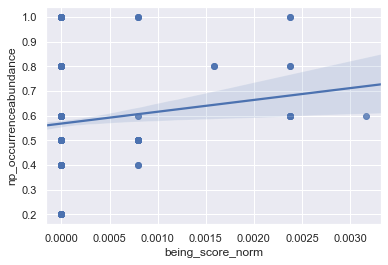

In [10]:
# df_beings.plot(kind='scatter', x='being_mentions_norm', y='np_occurrenceabundance')
sns.regplot(x='being_score_norm', y='np_occurrenceabundance', data=df_beings_clean)

In [11]:
df_beings_clean = df_beings_clean[df_beings_clean['being_score_norm'] > 0.0]

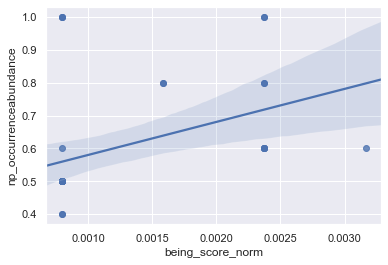

In [12]:
sns.regplot(x='being_score_norm', y='np_occurrenceabundance', data=df_beings_clean)

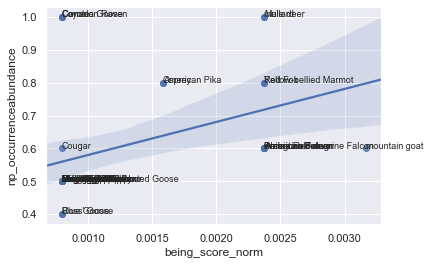

In [13]:
sns.regplot(x='being_score_norm', y='np_occurrenceabundance', data=df_beings_clean)
for i, row in df_beings_clean.iterrows():
    x = row['being_score_norm']
    y = row['np_occurrenceabundance']
    label = row['Long name str']
    plt.text(x, y, label, fontsize=9)
plt.show()

American Peregrine Falcon
Blue Goose
Cackling Goose
Canada Goose
Common Raven
Greater White-fronted Goose
Mallard
Osprey
Peregrine Falcon
Prairie Falcon
Ross' Goose


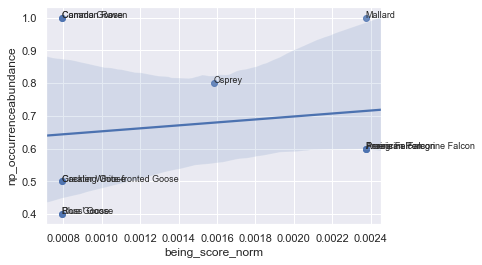

In [15]:
df_beings_clean_birds = df_beings_clean[df_beings_clean['Category'] == 'Bird']
sns.regplot(x='being_score_norm', y='np_occurrenceabundance', data=df_beings_clean_birds)
for i, row in df_beings_clean_birds.iterrows():
    x = row['being_score_norm']
    y = row['np_occurrenceabundance']
    label = row['Long name str']
    print(label)
    plt.text(x, y, label, fontsize=9)
plt.show()

In [19]:
df_beings_trail_s = df_beings_trail.join(df_np_fauna_renum_nomissing_uniq_short, on='being_id')
df_beings_trail_s

,being_id,being_score,being_score_norm,m10_s,m10_t,m11_s,m11_t,m12_s,m12_t,m1_s,...,np_occurrenceabundance,park,trail,Park Name,Long name str,Short name,Category,Scientific Name,Occurrence,Abundance
0,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,yellowstone-national-park,belcher-river-trail-lone-star-trailhead-to-bel...,Yellowstone National Park,'Anicia' Variable Checkerspot,[checkerspot],Insect,Euphydryas chalcedona anicia,1.0,0.5
1,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,yellowstone-national-park,biscuit-basin-interpretive-trail,Yellowstone National Park,'Anicia' Variable Checkerspot,[checkerspot],Insect,Euphydryas chalcedona anicia,1.0,0.5
2,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,yellowstone-national-park,biscuit-basin-to-goose-lake-via-little-firehole,Yellowstone National Park,'Anicia' Variable Checkerspot,[checkerspot],Insect,Euphydryas chalcedona anicia,1.0,0.5
3,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,yellowstone-national-park,black-sand-basin-loop-yellowstone-np,Yellowstone National Park,'Anicia' Variable Checkerspot,[checkerspot],Insect,Euphydryas chalcedona anicia,1.0,0.5
4,92385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,yellowstone-national-park,delacy-creek-trail-to-shoshone-lake,Yellowstone National Park,'Anicia' Variable Checkerspot,[checkerspot],Insect,Euphydryas chalcedona anicia,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18871,93110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,yellowstone-national-park,shoshone-lake-via-delacy-creek-trail,Yellowstone National Park,yellow pine chipmunk,[chipmunk],Mammal,Neotamias amoenus,1.0,0.8
18872,93110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,yellowstone-national-park,solitary-geyser,Yellowstone National Park,yellow pine chipmunk,[chipmunk],Mammal,Neotamias amoenus,1.0,0.8
18873,93110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,yellowstone-national-park,summit-lake-trail,Yellowstone National Park,yellow pine chipmunk,[chipmunk],Mammal,Neotamias amoenus,1.0,0.8
18874,93110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,yellowstone-national-park,upper-geyser-basin-and-old-faithful-observatio...,Yellowstone National Park,yellow pine chipmunk,[chipmunk],Mammal,Neotamias amoenus,1.0,0.8


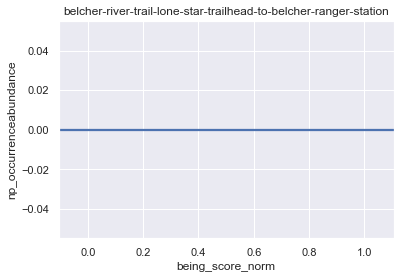

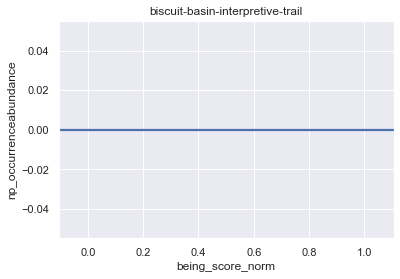

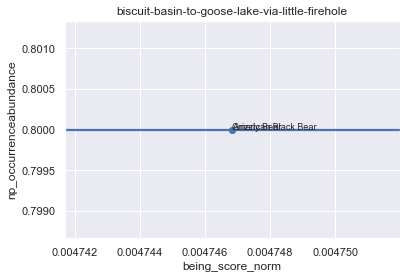

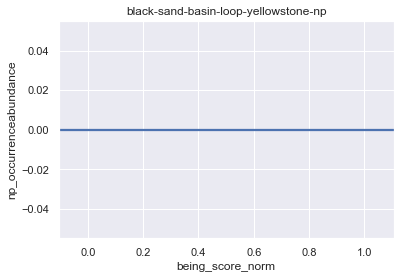

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


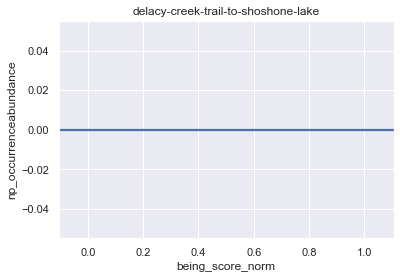

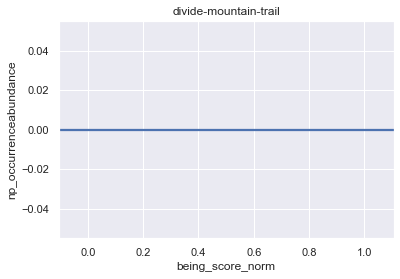

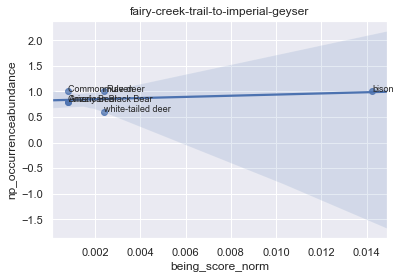

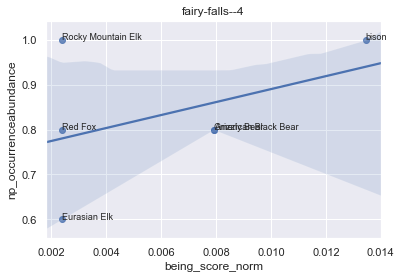

posx and posy should be finite values
posx and posy should be finite values


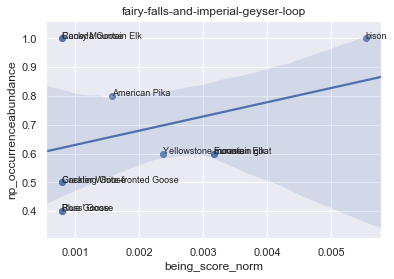

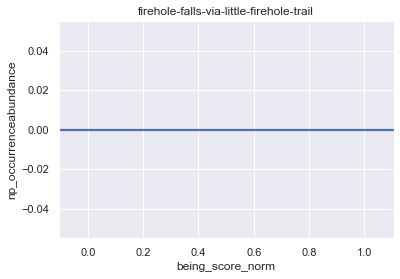

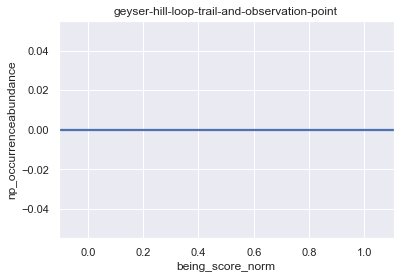

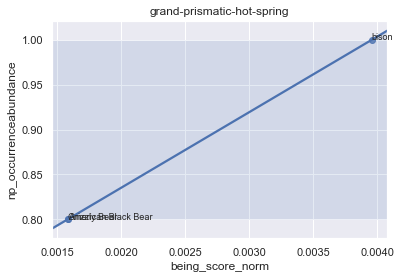

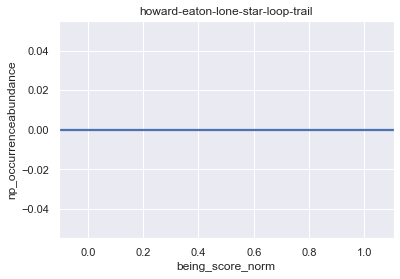

posx and posy should be finite values
posx and posy should be finite values


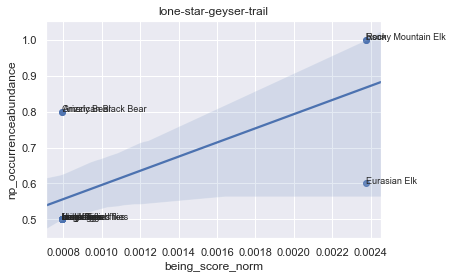

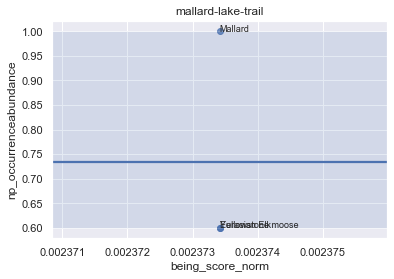

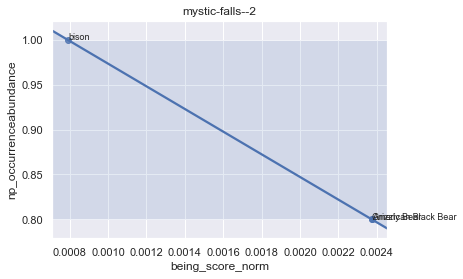

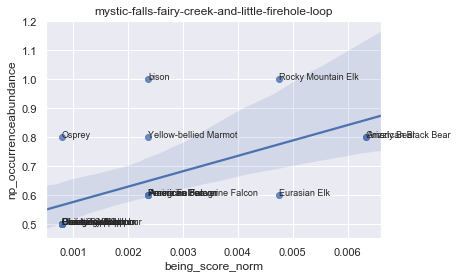

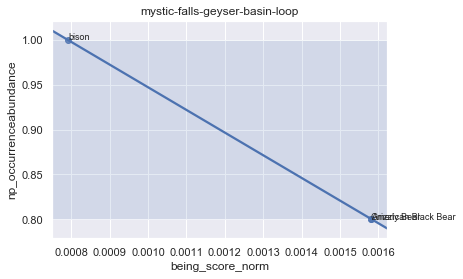

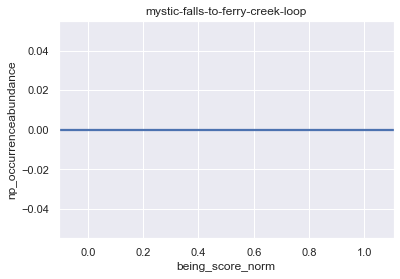

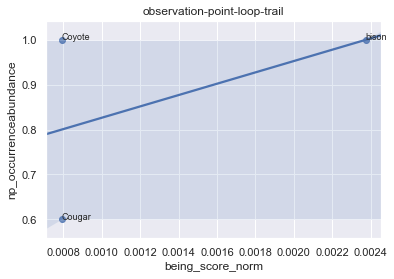

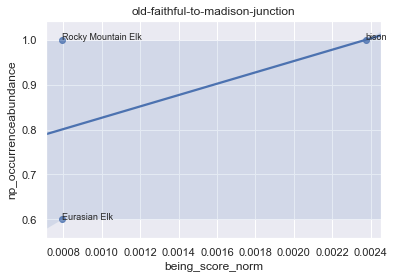

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


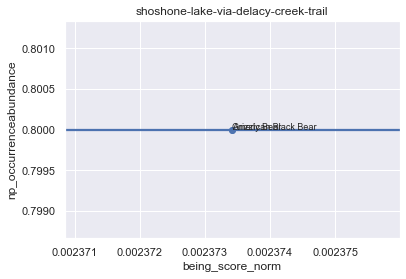

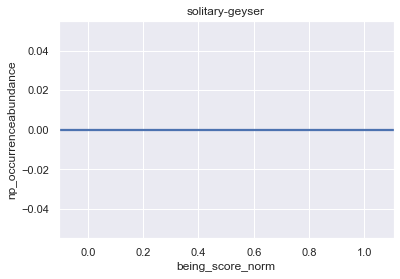

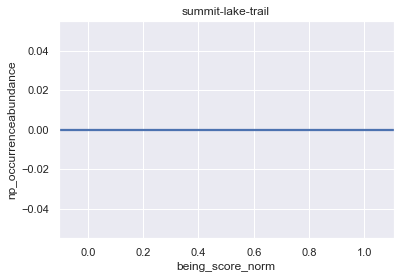

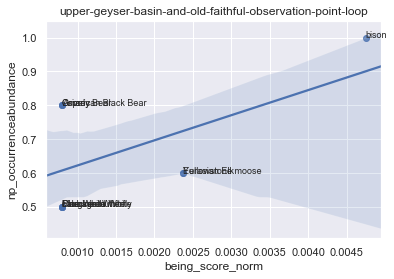

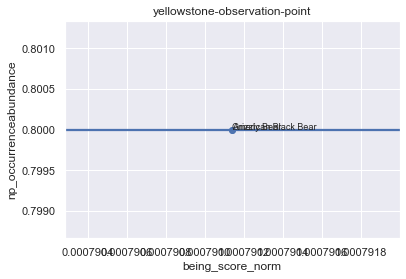

In [27]:
trail_list = list(df_beings_trail_s.groupby('trail').size().index)
for trail in trail_list:
    df_beings_trail_s_test = df_beings_trail_s[df_beings_trail_s['trail'] == trail]
    df_beings_trail_s_test = df_beings_trail_s_test[df_beings_trail_s_test['being_score'] > 0.0]
    
    ax = sns.regplot(x='being_score_norm', y='np_occurrenceabundance', data=df_beings_trail_s_test)
    ax.set_title(trail)
    for i, row in df_beings_trail_s_test.iterrows():
        x = row['being_score_norm']
        y = row['np_occurrenceabundance']
        label = row['Long name str']
        # print(label)
        if (x > 0.0):
            plt.text(x, y, label, fontsize=9)
    plt.show()

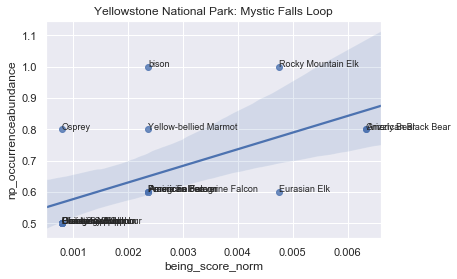

In [29]:
df_beings_trail_s_test = df_beings_trail_s[df_beings_trail_s['trail'] == 'mystic-falls-fairy-creek-and-little-firehole-loop']
df_beings_trail_s_test = df_beings_trail_s_test[df_beings_trail_s_test['being_score'] > 0.0]
ax = sns.regplot(x='being_score_norm', y='np_occurrenceabundance', data=df_beings_trail_s_test)
ax.set_title('Yellowstone National Park: Mystic Falls Loop')
for i, row in df_beings_trail_s_test.iterrows():
    x = row['being_score_norm']
    y = row['np_occurrenceabundance']
    label = row['Long name str']
    if (x > 0.0):
        plt.text(x, y, label, fontsize=9)
plt.savefig('mystic-falls-fairy-creek-and-little-firehole-loop.svg')

# This is the main validation plot

Sulphur butterfly
Osprey
Beaver, peregrine falcon
Yellow-bellied Marmot
bison
Eurasian Elk
Rocky Mountain Elk
Black bear, grizzly bear


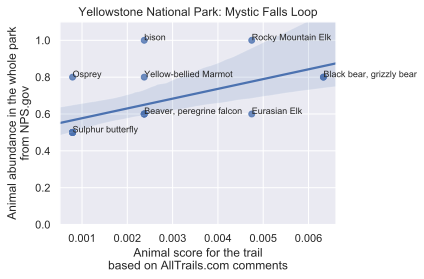

In [70]:
df_beings_trail_s_test = df_beings_trail_s[df_beings_trail_s['trail'] == 'mystic-falls-fairy-creek-and-little-firehole-loop']
df_beings_trail_s_test = df_beings_trail_s_test[df_beings_trail_s_test['being_score'] > 0.0]
ax = sns.regplot(x='being_score_norm', y='np_occurrenceabundance', data=df_beings_trail_s_test)
ax.set_title('Yellowstone National Park: Mystic Falls Loop')
ax.set(xlabel='Animal score for the trail\nbased on AllTrails.com comments', ylabel='Animal abundance in the whole park\nfrom NPS.gov')
ax.set(ylim=[0, 1.1])
df_beings_trail_s_test_labels = df_beings_trail_s_test[['Long name str','being_score_norm','np_occurrenceabundance']].groupby(['being_score_norm','np_occurrenceabundance']).agg({
    'Long name str': ' '.join
}).reset_index()
for i, row in df_beings_trail_s_test_labels.iterrows():
    x = row['being_score_norm']
    y = row['np_occurrenceabundance']
    label = row['Long name str']
    if ('Sulphur' in label):
        label='Sulphur butterfly'
    if ('Beaver' in label):
        label='Beaver, peregrine falcon'
    if ('Bear' in label):
        label='Black bear, grizzly bear'
    if (x > 0.0):
        plt.text(x, y, label, fontsize=9)
        print(label)
plt.tight_layout()
plt.savefig('validation_yellowstone_mystic_falls_loop.svg')

[53.088]
0.5240000000000001
0.3493069306930693


C:\Users\Sumit\.conda\envs\insight\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Sumit\.conda\envs\insight\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


                              OLS Regression Results                              
Dep. Variable:     np_occurrenceabundance   R-squared:                       0.349
Model:                                OLS   Adj. R-squared:                  0.309
Method:                     Least Squares   F-statistic:                     8.589
Date:                    Fri, 04 Oct 2019   Prob (F-statistic):            0.00980
Time:                            16:31:40   Log-Likelihood:                 10.489
No. Observations:                      18   AIC:                            -16.98
Df Residuals:                          16   BIC:                            -15.20
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


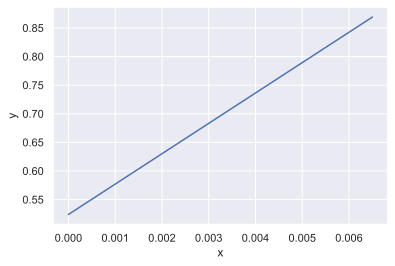

In [71]:
x_test = df_beings_trail_s_test[['being_score_norm']]
y_test = df_beings_trail_s_test['np_occurrenceabundance']

reg = LinearRegression()
reg.fit(x_test, y_test)

print(reg.coef_)
print(reg.intercept_)

y_pred = reg.predict(x_test)
print(r2_score(y_test, y_pred))

X2 = sm.add_constant(x_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())

x = np.linspace(0,0.0065)
y = reg.coef_ * x + reg.intercept_
df_test_reg = pd.DataFrame(list(zip(x, y)), columns=['x', 'y'])
sns.lineplot(x='x', y='y', data=df_test_reg)

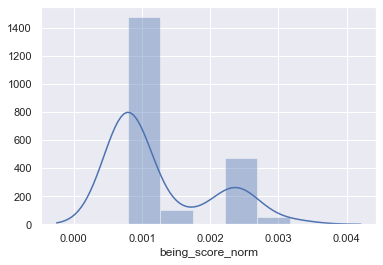

In [338]:
sns.distplot(df_beings_clean['being_score_norm'])

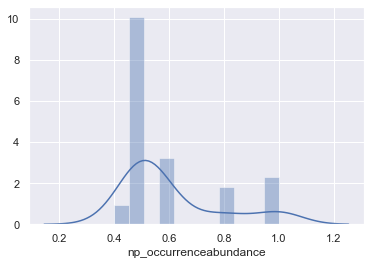

In [339]:
sns.distplot(df_beings_clean['np_occurrenceabundance'])

In [340]:
df_beings_clean['np_occurrence'].mean()

1.0

# Make models by season/month

In [341]:
def doy_to_season(day_of_year):
    if day_of_year in range(80, 172):
        return 1 # spring
    if day_of_year in range(172, 264):
        return 2 # summer
    if day_of_year in range(264, 355):
        return 3 # autumn / fall
    return 0 # winter

In [248]:
print(df_beings_s['being_mentions'].sum())
print(61+193+687+153) # print(df_beings_s['being_mentions_0/1/2/3'].sum())

1094
1094


In [249]:
print(df_beings_s['being_mentions_norm_0'].sum())
print(df_beings_s['being_mentions_norm_1'].sum())
print(df_beings_s['being_mentions_norm_2'].sum())
print(df_beings_s['being_mentions_norm_3'].sum())

0.004652936689549962
0.014721586575133484
0.05240274599542334
0.011670480549199084


In [342]:
df_beings_s.nlargest(50,columns=['being_score_norm'])#.merge(df_np_fauna_uniq_pop, left_index=True, right_index=True)

,being_id,being_score,being_score_norm,m10_s,m10_t,m11_s,m11_t,m12_s,m12_t,m1_s,...,np_occurrence,np_occurrenceabundance,park,Park Name,Long name str,Short name,Category,Scientific Name,Occurrence,Abundance
588,92973,33.5,0.053006,3.5,0.0875,3.0,0.176471,1.5,0.115385,0.0,...,1.0,1.0,yellowstone-national-park,Yellowstone National Park,bison,"[bison, buffalo]",Mammal,Bison bison,1.0,1.0
9,92394,19.0,0.030063,3.0,0.0750,0.0,0.000000,0.5,0.038462,0.0,...,1.0,0.8,yellowstone-national-park,Yellowstone National Park,American Black Bear,[bear],Mammal,Ursus americanus,1.0,0.8
246,92631,19.0,0.030063,3.0,0.0750,0.0,0.000000,0.5,0.038462,0.0,...,1.0,0.8,yellowstone-national-park,Yellowstone National Park,Grizzly Bear,[bear],Mammal,Ursus arctos horribilis,1.0,0.8
191,92576,11.5,0.018196,1.5,0.0375,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.6,yellowstone-national-park,Yellowstone National Park,Eurasian Elk,"[elk, moose]",Mammal,Alces alces,1.0,0.6
422,92807,7.0,0.011076,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,1.0,yellowstone-national-park,Yellowstone National Park,Rocky Mountain Elk,[elk],Mammal,Cervus elaphus,1.0,1.0
576,92961,4.5,0.007120,1.5,0.0375,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.6,yellowstone-national-park,Yellowstone National Park,Yellowstone moose,[moose],Mammal,Alces alces shirasi,1.0,0.6
650,93035,2.0,0.003165,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.6,yellowstone-national-park,Yellowstone National Park,mountain goat,[goat],Mammal,Oreamnos americanus,1.0,0.6
7,92392,1.5,0.002373,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.6,yellowstone-national-park,Yellowstone National Park,American Beaver,[beaver],Mammal,Castor canadensis,1.0,0.6
21,92406,1.5,0.002373,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.6,yellowstone-national-park,Yellowstone National Park,American Peregrine Falcon,[falcon],Bird,Falco peregrinus anatum,1.0,0.6
306,92691,1.5,0.002373,1.5,0.0375,0.0,0.000000,0.0,0.000000,0.0,...,1.0,1.0,yellowstone-national-park,Yellowstone National Park,Mallard,[mallard],Bird,Anas platyrhynchos,1.0,1.0


In [343]:
df_beings_s.nlargest(50,columns=['m6_s'])#.merge(df_np_fauna_uniq_pop, left_index=True, right_index=True)

,being_id,being_score,being_score_norm,m10_s,m10_t,m11_s,m11_t,m12_s,m12_t,m1_s,...,np_occurrence,np_occurrenceabundance,park,Park Name,Long name str,Short name,Category,Scientific Name,Occurrence,Abundance
9,92394,19.0,0.030063,3.0,0.0750,0.0,0.000000,0.5,0.038462,0.0,...,1.0,0.8,yellowstone-national-park,Yellowstone National Park,American Black Bear,[bear],Mammal,Ursus americanus,1.0,0.8
246,92631,19.0,0.030063,3.0,0.0750,0.0,0.000000,0.5,0.038462,0.0,...,1.0,0.8,yellowstone-national-park,Yellowstone National Park,Grizzly Bear,[bear],Mammal,Ursus arctos horribilis,1.0,0.8
588,92973,33.5,0.053006,3.5,0.0875,3.0,0.176471,1.5,0.115385,0.0,...,1.0,1.0,yellowstone-national-park,Yellowstone National Park,bison,"[bison, buffalo]",Mammal,Bison bison,1.0,1.0
7,92392,1.5,0.002373,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.6,yellowstone-national-park,Yellowstone National Park,American Beaver,[beaver],Mammal,Castor canadensis,1.0,0.6
0,92385,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,'Anicia' Variable Checkerspot,[checkerspot],Insect,Euphydryas chalcedona anicia,1.0,0.5
1,92386,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,'Hesperis' Atlantis Fritillary,[fritillary],Insect,Speyeria atlantis hesperis,1.0,0.5
2,92387,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,Acmon Blue,[blue],Insect,"[Plebejus acmon, Plebejus acmon lutzi]",1.0,0.5
3,92388,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,Adam peaclam,[peaclam],Other Non-vertebrates,Pisidium adamsi,1.0,0.5
4,92389,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,Afranius Duskywing,[duskywing],Insect,Erynnis afranius,1.0,0.5
5,92390,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,1.0,0.4,yellowstone-national-park,Yellowstone National Park,American Avocet,[avocet],Bird,Recurvirostra americana,1.0,0.4


In [344]:
df_beings_s.nlargest(50,columns=['m3_s'])#.merge(df_np_fauna_uniq_pop, left_index=True, right_index=True)

,being_id,being_score,being_score_norm,m10_s,m10_t,m11_s,m11_t,m12_s,m12_t,m1_s,...,np_occurrence,np_occurrenceabundance,park,Park Name,Long name str,Short name,Category,Scientific Name,Occurrence,Abundance
191,92576,11.5,0.018196,1.5,0.0375,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.6,yellowstone-national-park,Yellowstone National Park,Eurasian Elk,"[elk, moose]",Mammal,Alces alces,1.0,0.6
422,92807,7.0,0.011076,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,...,1.0,1.0,yellowstone-national-park,Yellowstone National Park,Rocky Mountain Elk,[elk],Mammal,Cervus elaphus,1.0,1.0
0,92385,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,'Anicia' Variable Checkerspot,[checkerspot],Insect,Euphydryas chalcedona anicia,1.0,0.5
1,92386,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,'Hesperis' Atlantis Fritillary,[fritillary],Insect,Speyeria atlantis hesperis,1.0,0.5
2,92387,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,Acmon Blue,[blue],Insect,"[Plebejus acmon, Plebejus acmon lutzi]",1.0,0.5
3,92388,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,Adam peaclam,[peaclam],Other Non-vertebrates,Pisidium adamsi,1.0,0.5
4,92389,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.5,yellowstone-national-park,Yellowstone National Park,Afranius Duskywing,[duskywing],Insect,Erynnis afranius,1.0,0.5
5,92390,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.4,yellowstone-national-park,Yellowstone National Park,American Avocet,[avocet],Bird,Recurvirostra americana,1.0,0.4
6,92391,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.8,yellowstone-national-park,Yellowstone National Park,American Badger,[badger],Mammal,Taxidea taxus,1.0,0.8
7,92392,1.5,0.002373,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.6,yellowstone-national-park,Yellowstone National Park,American Beaver,[beaver],Mammal,Castor canadensis,1.0,0.6


In [197]:
df_test = df_np_fauna_renum_nomissing.copy()
df_test = df_test[df_test['Short name'].apply(lambda x: False if not isinstance(x, list) else ('bear' in x))] #df_beings_s[df_beings_s['Long name str'].str.contains('bison')]
df_test[df_test['Park Code'] == 'YELL']

,Region,Park Code,Park Name,Category,Category Sort,Order,Family,Taxon Code,TSN,Taxon Record Status,...,Vouchers,ExternalLinks,T&E,State Status,Ozone,GRank,SRank,Long name,Short name,Long name str
26,NaN,YELL,Yellowstone National Park,Mammal,1,Carnivora,Ursidae,93280,180544.0,Active,...,"1445578, 1445579, 1448245, 1448246, 1448247",NaN,NaN,ID: Big Game,NaN,G5,ID: S4; MT: S5; WY: S5,"[American Black Bear, black bear]",[bear],American Black Bear
27,NaN,YELL,Yellowstone National Park,Mammal,1,Carnivora,Ursidae,107229,202385.0,Active,...,"1449279, 1449399, 1449400, 1449414",NaN,"T,UR",NaN,NaN,NaN,NaN,[Grizzly Bear],[bear],Grizzly Bear


In [208]:
df_np_fauna_renum_nomissing_uniq_short[(df_np_fauna_renum_nomissing_uniq_short['Park Name'] == 'Yellowstone National Park') & df_np_fauna_renum_nomissing_uniq_short['Long name str'].str.contains('ear')]

,Park Name,Long name str,Short name,Category,Scientific Name,Occurrence,Abundance


In [184]:
# df_np_fauna_uniq_pop[df_np_fauna_uniq_pop['Long name str'].str.contains('bear')]

,Park Name,Long name str,Short name,Category,Scientific Name,Occurrence,Abundance
